<h1>EDA</h1>
<h2>Analisis Venta de Zapatillas en Estados Unidos</h2>

<h3>Introduccion</h3>
<p>En esta EDA la misión principal es el analisis de la venta de zapatillas a lo largo de Estados Unidos.</p>
<p>Atraves del analisis de varios dataset sobre la venta de zapatillas sacaremos conclusiones sobre el mejor 
estado donde se pueden abrir una tienda de zapatillas.
En concreto analizaremos solo las marcas Yeezy y Off-White que son las que mas mercad tienen. 
</p>
<br>
<p>
Algunos de los aspectos a tener en cuenta es: 
    <ul>
        <li>Cantidad de zapatillas vendidas de cada marca</li>
        <li>Zapatillas Vendidas en cada Estado</li>
        <li>Cantidad de zapatillas vendidas por estado, divido por la marca</li>
        <li>Talla de la cual se venden mas zapatillas</li>
</p>

<h2>Requisitos</h2>
<p>Lo primero en hacer es importar las librerias necesarias con las que vamos a trabajar</p>
<dl>
    <dt>Panda:
        <dd>Libreria para la manipulación de los Dataset</dd>
    </dt>
    <dt>
        Numpy:
        <dd>Libreria para realizar operaciones matematicas</dd>
    </dt>
    <dt>
        Folium:
        <dd>LIbreria para la utilización de Mapas</dd>
    </dt>
        
</dl>

In [1]:
#Importación de las librerias a utilizar:Pandas,Numpy,Folium
%matplotlib inline
import pandas as pd 
import numpy as np
import folium as fl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import requests
from branca.colormap import linear
import geopandas
import json as js

<h1>Primeros Pasos</h1>
<p>
El primer paso es volcar el dataset que hemos elegido, leerlo con pandas y asignarlo a una variable
Despues el paso lógico sería visualizarl los datos para comprobar como es el dataset.
</p>

In [2]:
df_zapatillas=pd.read_csv("StockX-Data-Contest-2019-3.csv")
df_zapatillas.head(5)

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


<h2>Exploración Inicial Dataset</h2>
<p>
    Ahora deberemos sacar información basica del Dataset como:    
</p>
<ul>
    <li>Numero de registros en el Dataset</li>
    <li>Lista de los indices</li>
    <li>Cantidad de nulos por columna</li>
    <li>Tipo de Datos de cada Indice</li>
    <li>Forma del Dataset</li>
    <li>Resumen informacion Dataset</li>
    <li>Informacion estadistica del Dataset</li>
</ul>

In [3]:
#Numero de registros en total del Dataset.
df_zapatillas.size

799648

In [4]:
#Lista con los indices,vemos la cantidad de columnas y el nombre de cada una.
df_zapatillas.columns.values

array(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price',
       'Retail Price', 'Release Date', 'Shoe Size', 'Buyer Region'],
      dtype=object)

In [5]:
#Cantidad de nulos por columna.En este caso vemos que no hay nulos en ninguna columna.
df_zapatillas.isnull().sum()

Order Date      0
Brand           0
Sneaker Name    0
Sale Price      0
Retail Price    0
Release Date    0
Shoe Size       0
Buyer Region    0
dtype: int64

In [6]:
#Sacar tipo de cada columna. 
df_zapatillas.dtypes

Order Date       object
Brand            object
Sneaker Name     object
Sale Price       object
Retail Price     object
Release Date     object
Shoe Size       float64
Buyer Region     object
dtype: object

In [7]:
#Forma del dataset. La cantidad de registros para las filas y para las columnas.
df_zapatillas.shape

(99956, 8)

In [8]:
#Resumen sobre el Dataset
df_zapatillas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  object 
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


In [9]:
#Sacar varios valores estadisticos sobre el Dataset:Media,cantidad de valores,promedio etc....
df_zapatillas.describe()

,Shoe Size
count,99956.000000
mean,9.344181
std,2.329588
min,3.500000
25%,8.000000
50%,9.500000
75%,11.000000
max,17.000000


<h1>Primeros Pasos</h1>
<p>Una vez visualiza la  información básica sobre el Dataset es momento de visualizar informacion mas detallada sobre los diferentes datos que se incluyen en el mismo</p>
<ul>
    <li>Valores maximos,minimos y Medias sobre las columnas tipo numéricas</li>
    <li>Visualizar la cantidad de Veces que se vende un tipo de zapatilla</li>
    <li>Visualizar la cantidad de veces que aparace cada Estado</li>
</ul>

<p>
Antes de realizar ninguna visualización, es necesario explicar el por que en este dataset en concreto no nos merece la pena eliminar los valores duplicados.</p>
<p>
Como hemos podido ver en el DataSet muchos valores se repiten:tallas,estados,nombre de zapatillas. 
Cada fila del dataset se refiere a una venta realizada de esa zapatilla por lo que es normal que muchos valores se repitan ya que normalmente se vende mas de una zapatilla para que que un negocio salge rentable.
Se decidiesemos quitar duplicados perderiamos muchisima información y no se podría realizar un analisis correcto
</p>


<h1>Valores Minimo,Maximo y Media</h1>

<p>En este apartado visualizaremos los valores maximos,minimos y la media de las siguientes columnas</p>
<ul>
    <li>Talla</li>
    <li>Precio Retail</li>
    <li>Precio Venta</li>
</ul>

<h3>Talla</h3>

In [10]:
#Valor Minimo
df_zapatillas["Shoe Size"].min()

np.float64(3.5)

In [11]:
#Valor Maximo 
df_zapatillas["Shoe Size"].max()

np.float64(17.0)

<h3>Precio Retail</h3>
<p>En este caso no se puede sacar valor minimo y maximo, ya que la columna es de tipo object, es decir, tipo string.</p> 
<p>Deberemos cambiar el tipo de la columna, ya que mas adelante deberemos visualizar mas datos. </p>

In [12]:
#Cambiar tipo de la columna Retail Price 
#Primero Deberemos eleminar el caracter '$' ya que este valor no debe aparacer una columna tipo numero
df_zapatillas["Sale Price"]=df_zapatillas["Sale Price"].str.replace("$","")
#También deberemos sustituir el valor ',' por el valor '.'
df_zapatillas["Sale Price"]=df_zapatillas["Sale Price"].str.replace(",","")
df_zapatillas.head(5)

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,$220,2/11/17,11.0,Rhode Island


In [13]:
#Una vez eliminado el valor y sustituido la coma , podremos cambiar el tipo de la columna
df_zapatillas["Sale Price"]=df_zapatillas["Sale Price"].astype('int64')
df_zapatillas["Sale Price"].dtypes

dtype('int64')

In [14]:
#Valor Minimo 
df_zapatillas["Sale Price"].min()

np.int64(186)

In [15]:
#Valor Maximo
df_zapatillas["Sale Price"].max()

np.int64(4050)

<h3>Precio Venta</h3>
<p>En este caso no se puede sacar valor minimo y maximo, ya que la columna es de tipo object, es decir, tipo string.</p> 
<p>Deberemos cambiar el tipo de la columna, ya que mas adelante deberemos visualizar mas datos. </p>

In [16]:
#Cambiar tipo de la columna Retail Price 
#Primero Deberemos eleminar el caracter '$' ya que este valor no debe aparacer una columna tipo numero
df_zapatillas["Retail Price"]=df_zapatillas["Retail Price"].str.replace("$","")
#También deberemos sustituir el valor ',' por el valor ''
df_zapatillas["Retail Price"]=df_zapatillas["Retail Price"].str.replace(",","")
df_zapatillas.head(5)

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2/11/17,11.0,Rhode Island


In [17]:
#Una vez eliminado el valor y sustituido la coma , podremos cambiar el tipo de la columna
df_zapatillas["Retail Price"]=df_zapatillas["Retail Price"].astype('int64')
df_zapatillas=df_zapatillas.sort_values(["Retail Price","Sale Price"],ascending=[True,False])
df_zapatillas["Retail Price"].dtypes

dtype('int64')

In [18]:
#Valor Minimo 
df_zapatillas["Retail Price"].min()

np.int64(130)

In [19]:
#Valor Maximo
df_zapatillas["Retail Price"].max()

np.int64(250)

<h1>Graficos</h1>
<p>En este apartado visualizaremos una serie de graficos para poder sacar conclusiones sobre los datos obtenidos</p>
<p>Para la creación de graficas usaremos la libreria Seaborn</p>


<p>El primer gráfico sera sobre la cantidad de zapatillas vendidas de cada tipo:Yeezy,Off-White</p>

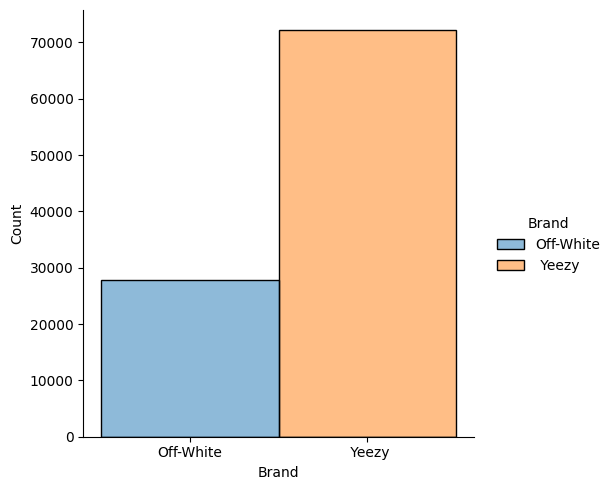

In [20]:

sns.displot(
    data=df_zapatillas,
    x="Brand",
    hue="Brand"
    )

<p>En el siguiente grafico visualizaremos los precios de cada tipo de zapatilla.</p>
<p>Visualizaremos Dos graficas</p>
<ul>
    <li>Primera Grafica: Diferentes precios de las zapatillas Yeezy</li>
    <li>Segunda Grafica: Diferentes precios de las zapatillas Off-White</li>
</ul>

<h3>Grafico Precios</h3>
<p>En la primera gráfica podemos observar que las zapatillas se dividen en dos precios: 200 y 220. 
La mayoria se venden en 220 y solo ciertas zapatillas se venden en 200
</p>
<p>
En la segunda gráfica podemos observar que los precios de las zapatillas Off-White estan mas divididos que en las zapatillas de la marca Yeezy. 
Tiene un rango de 130 a 250.
</p>

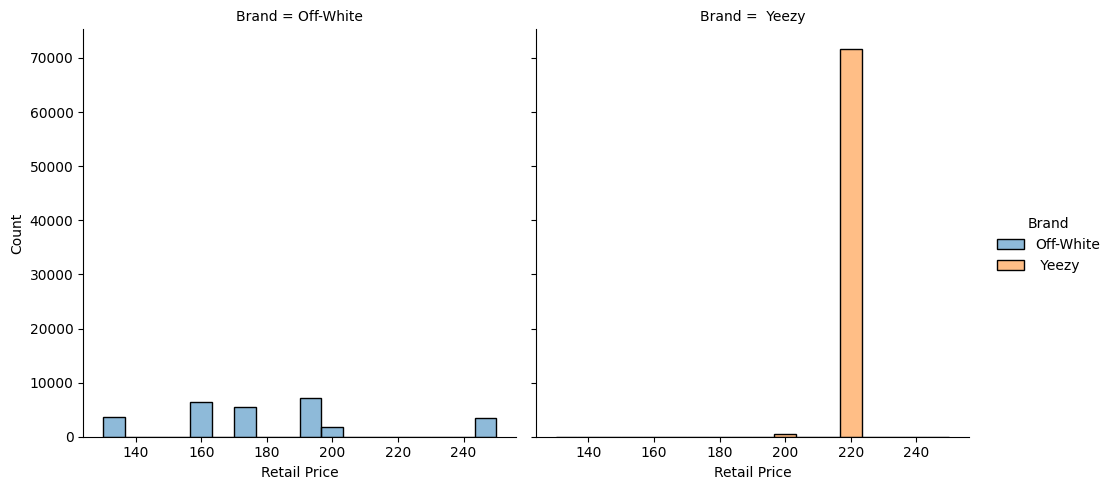

In [21]:
sns.displot(
    data=df_zapatillas,
    x="Retail Price",
    hue="Brand",
    col="Brand")

<h3>Grafico Estados</h3>
<p>En esta gráfica visualizaremos la cantidad de zapatillas que se han vendido por estado divido por marca</p>
<p>A la hora de visualizar la gráfica, los valores de X se sobreponen unos a otros ya que hay demasiados valores y el tamaño de la gráfico es limitido. Deberemos usar la libreria matplotlib para primero pintar el tamaño del cuadro de la gráfico deseado y despues volcar los datos</p>

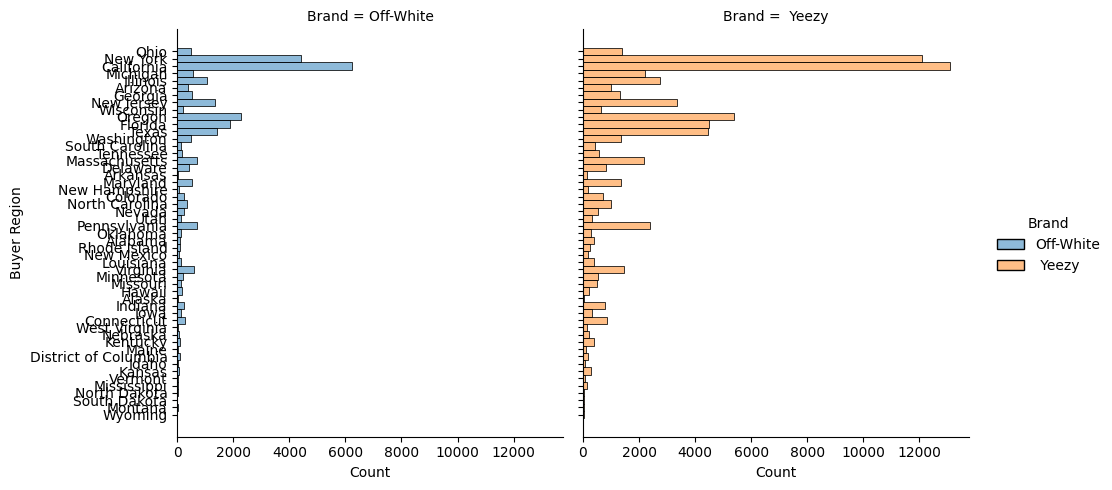

In [22]:

sns.displot(
    data=df_zapatillas,
    y="Buyer Region",
    hue="Brand",
    col="Brand",
    label="Zapatilla por Estado"
)

<h3>Gráfico Tallas</h3>
<p>En este gráfico se visualizará la diferencia de tallas vendidas divido por Marca. Como podemos ver las dos marcas tienen casi el mismo rango de tallas con la diferencia de los valores atipicos que serian los circulos. En la marca Off-White podemos ver que hay mas valores atipicos que en Yeezy</p>

<Axes: xlabel='Brand', ylabel='Shoe Size'>

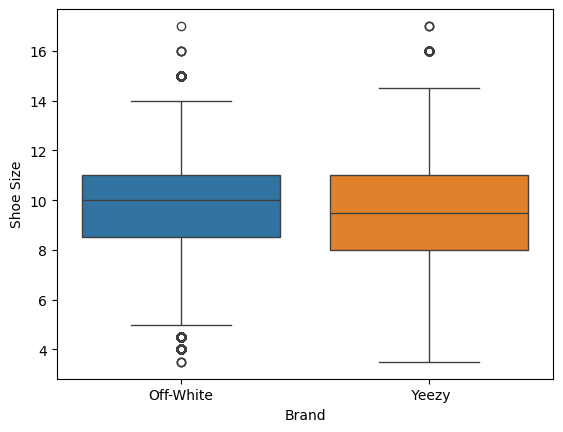

In [23]:
sns.boxplot(
    data=df_zapatillas,
    x="Brand",
    y="Shoe Size",
    hue="Brand")
    

<h3>Gráficos Precio Venta Zapatillas</h3>
<p>En este apartado crearemos 3 gráficos para visualizar la cantidad por la que se vendio al comprador final, la cantidad por la que se compro al distribuidor original.
Y la ultima la comparación de las dos para saber la ganancia.
</p>

<h5>Precio Venta Final</h5>

<Axes: xlabel='Sale Price', ylabel='Sneaker Name'>

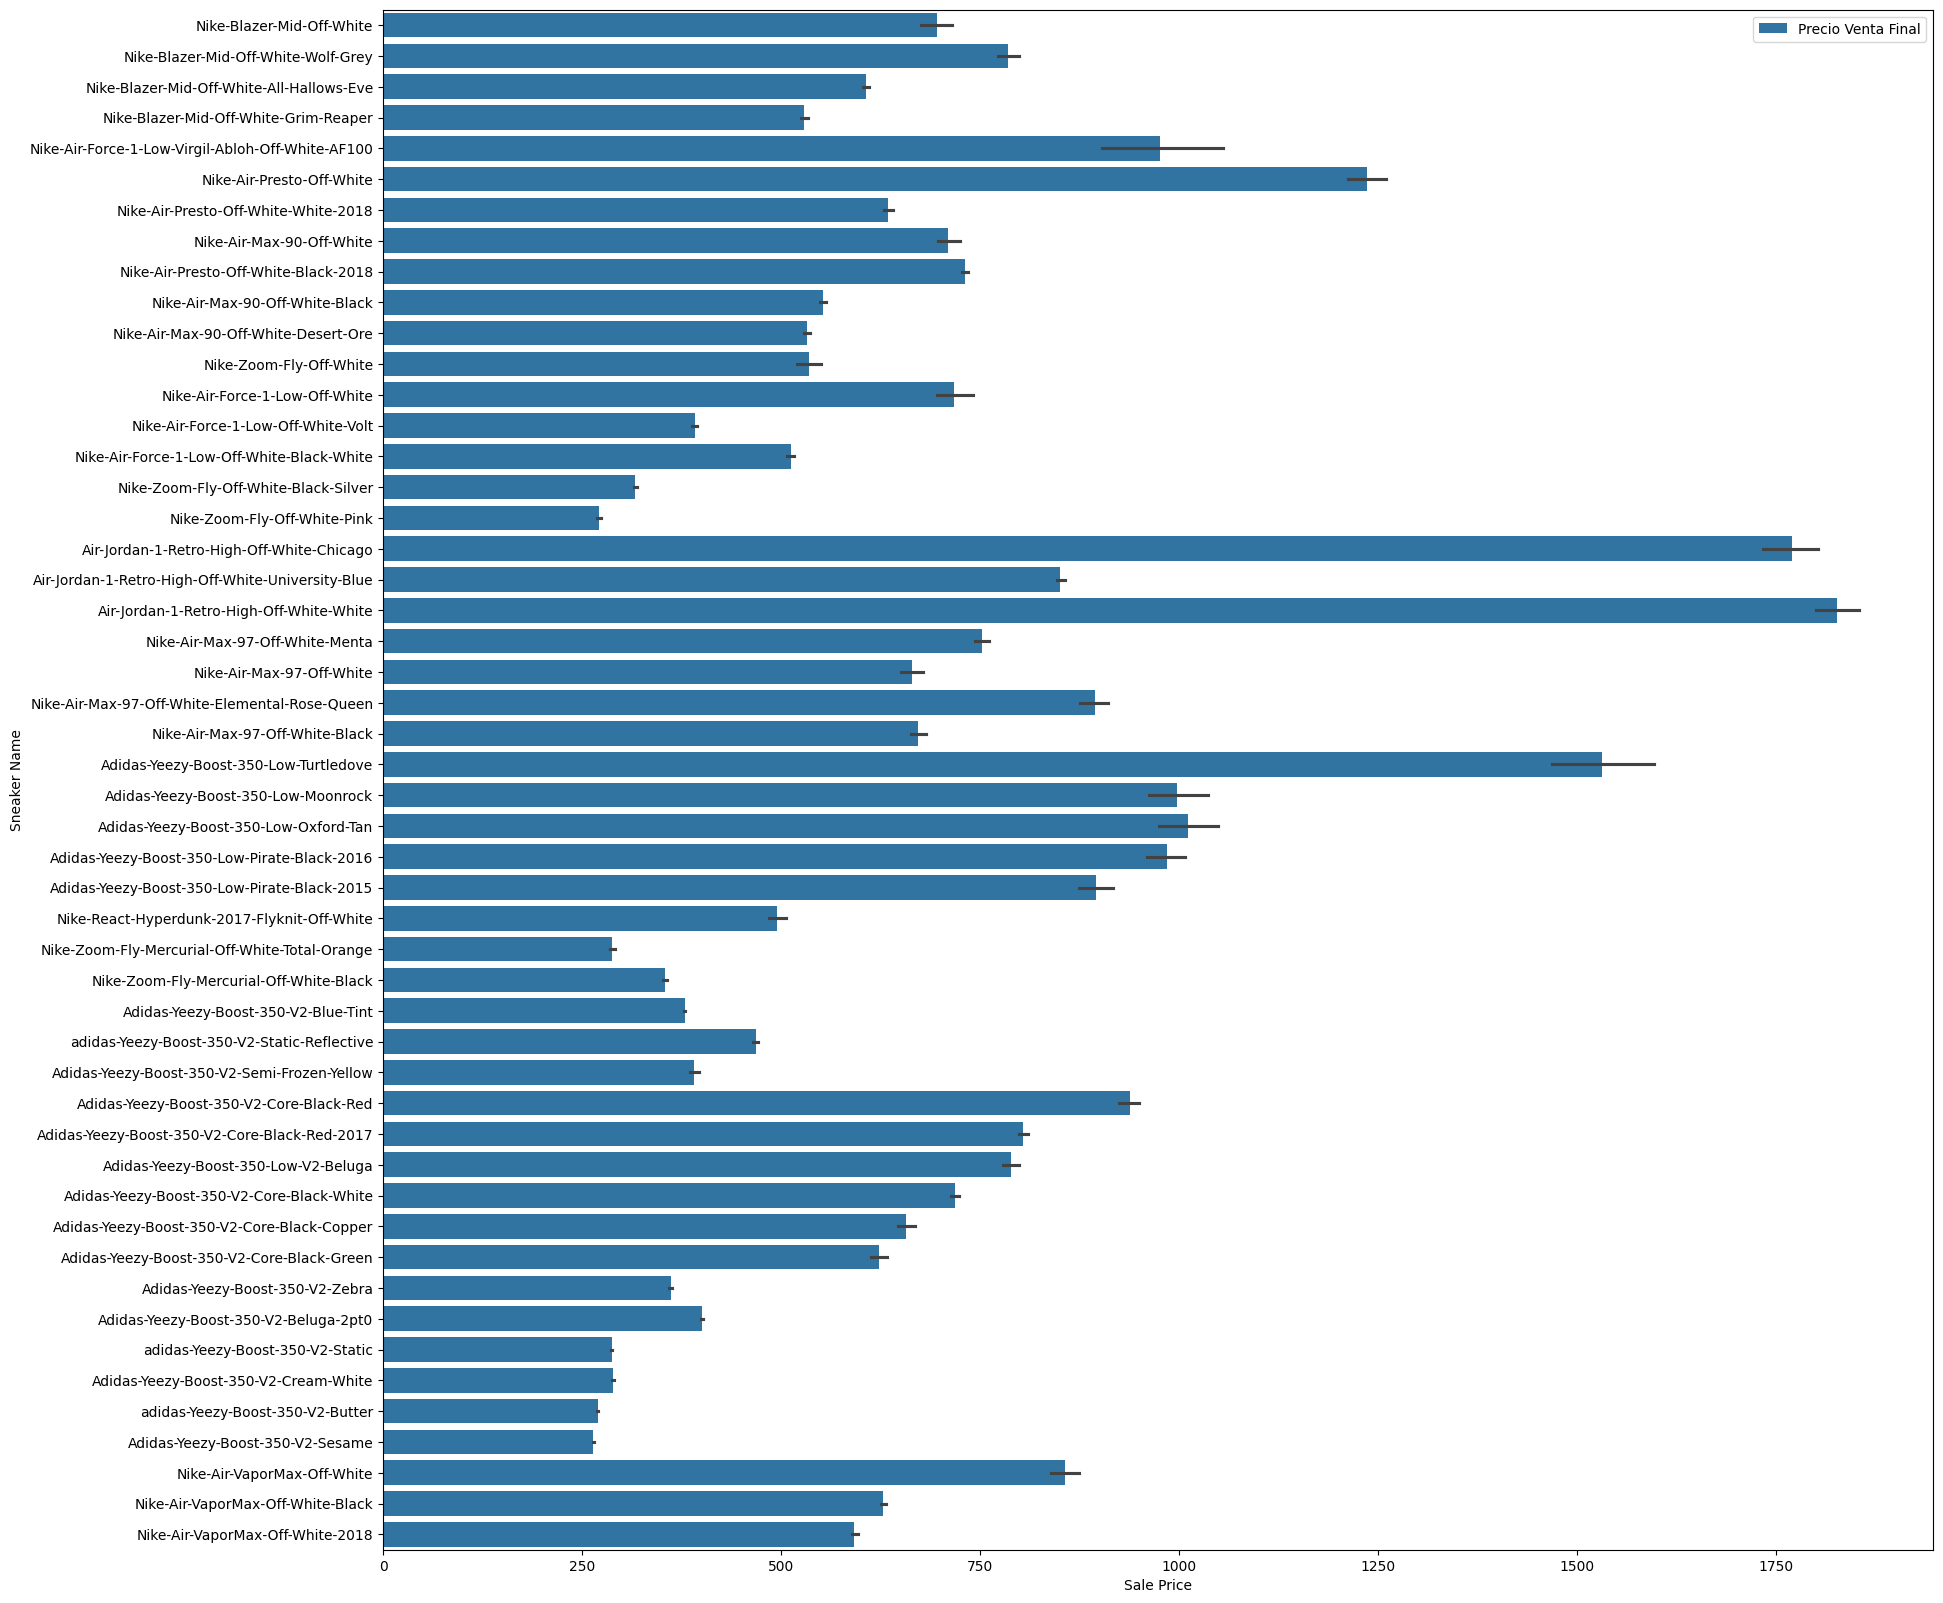

In [24]:
f,ax=plt.subplots(figsize=(20,20))
sns.barplot(
    data=df_zapatillas,
    y="Sneaker Name",
    x="Sale Price",
    label="Precio Venta Final"
)

<h5>Gráfico precio primera venta</h5>

<Axes: xlabel='Retail Price', ylabel='Sneaker Name'>

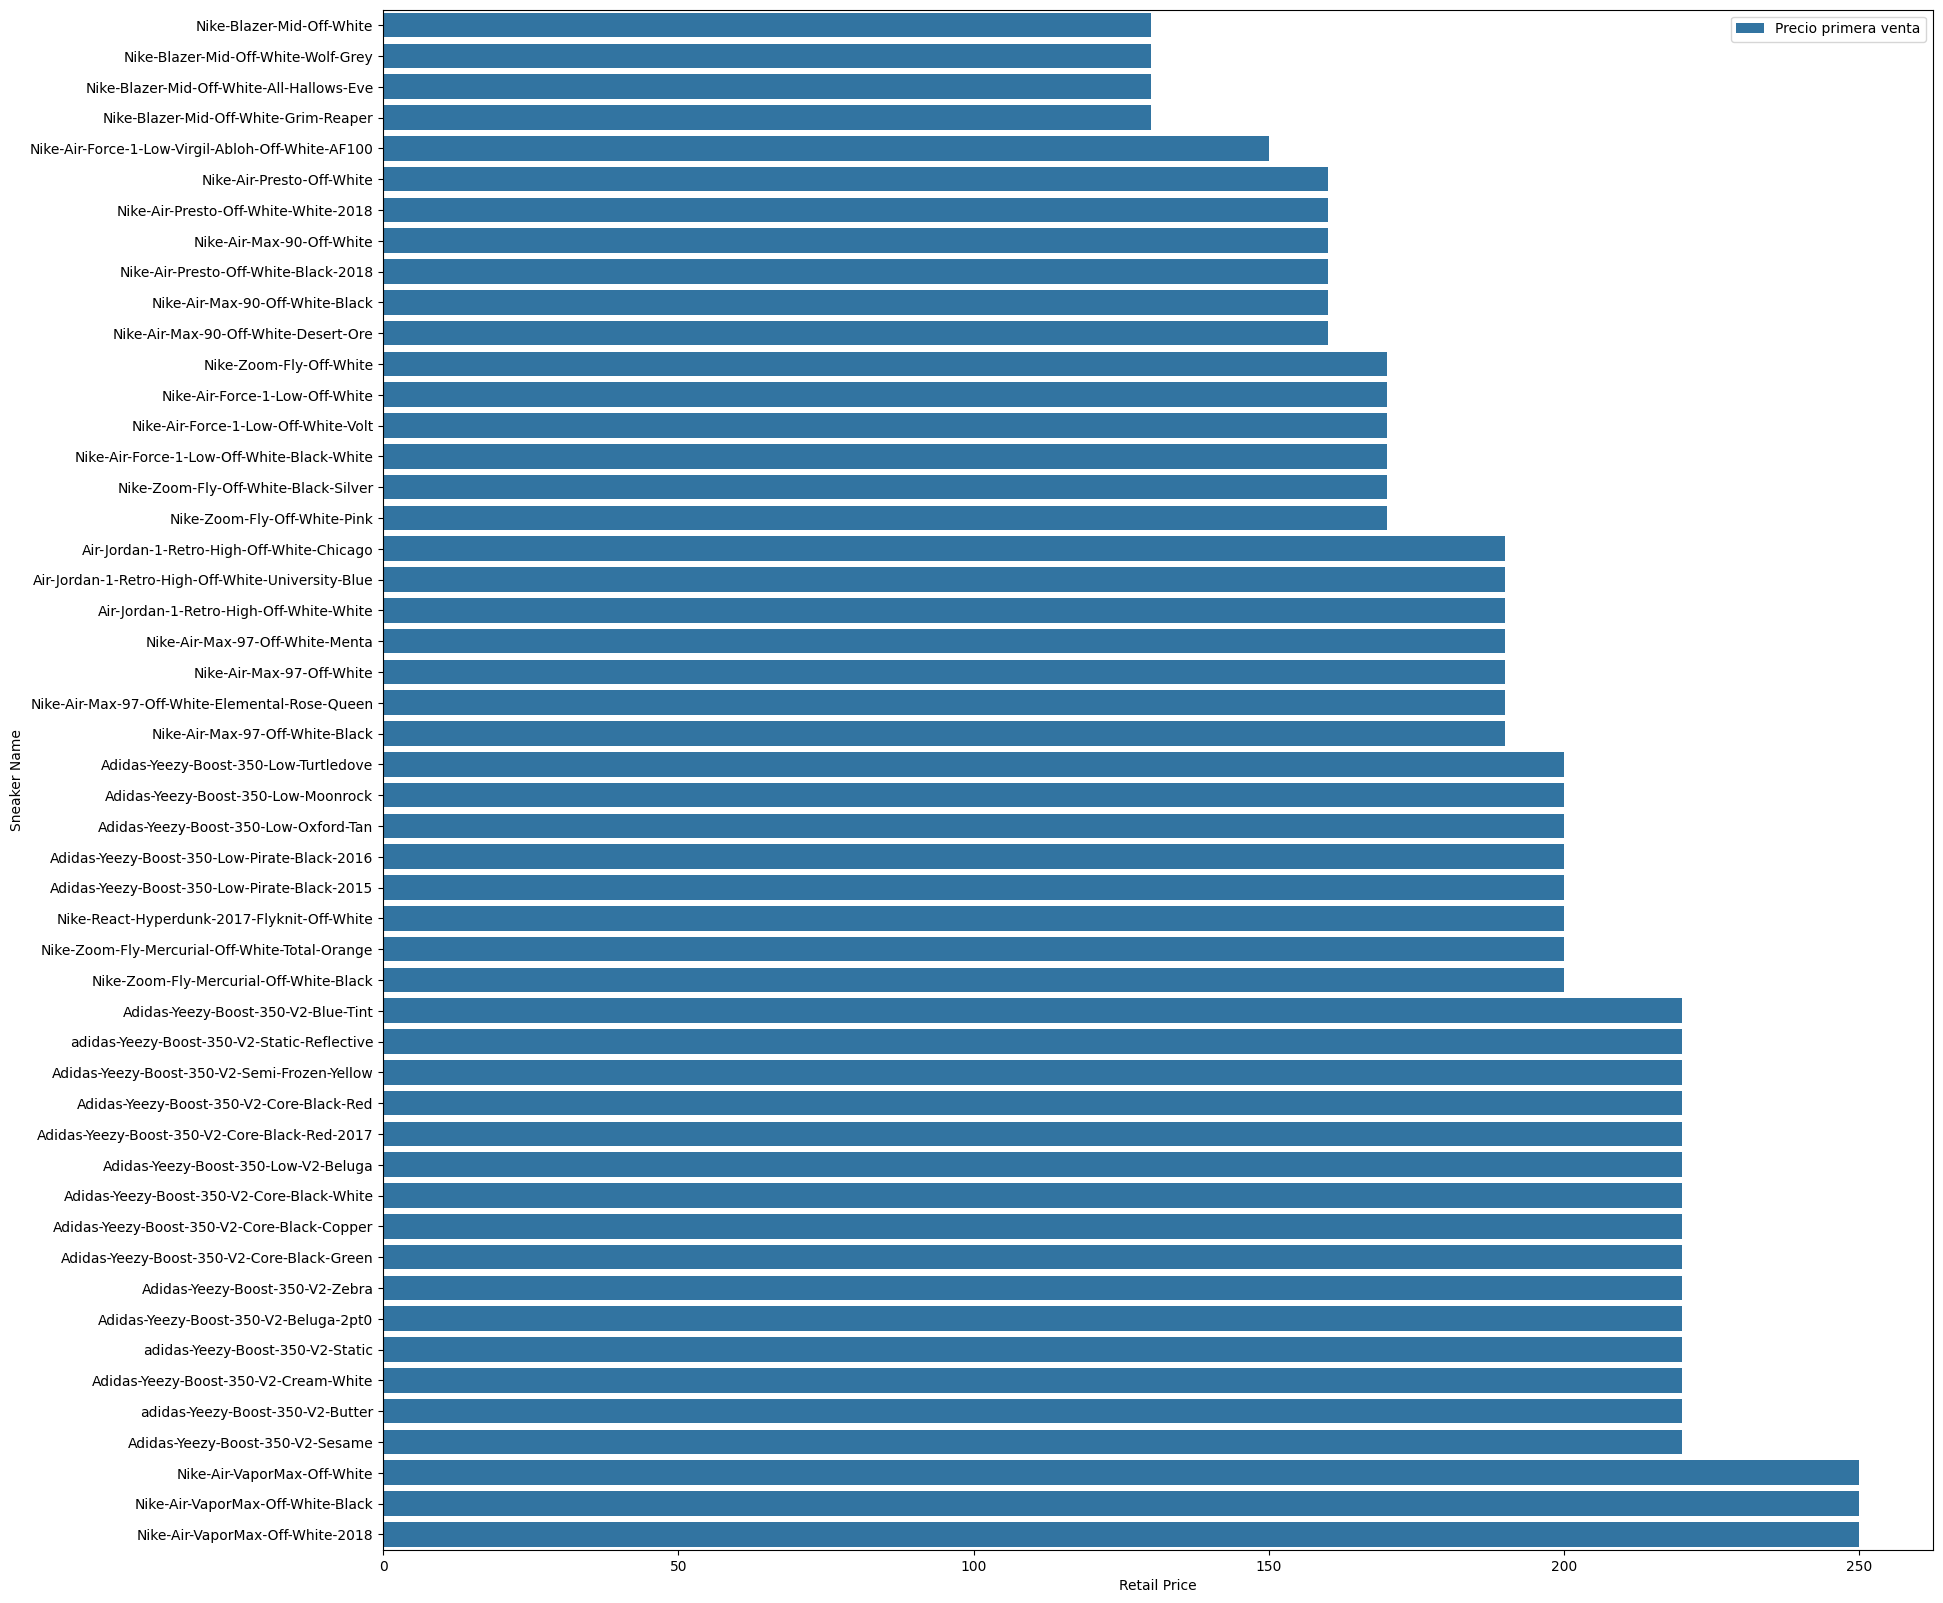

In [25]:

f,ax=plt.subplots(figsize=(20,20))
sns.barplot(
    data=df_zapatillas,
    y="Sneaker Name",
    x="Retail Price",
    label="Precio primera venta"
    )

<h3>Grafico Ganancia</h3>
<p>En este gráfico visualizaremos la ganancia que tenemos por cada modelo de zapatilla. El grafico de barras azul visualiza el precio final de la zapatilla a la hora de vender al usuario final, el gráfico verde representa el precio de la zapatilla a la hora de comprarlo del distribuidor de la marca oficial.  </p>
<p>En este tipo de gráfico se puede observar la ganancia</p>

<Axes: xlabel='Sale Price', ylabel='Sneaker Name'>

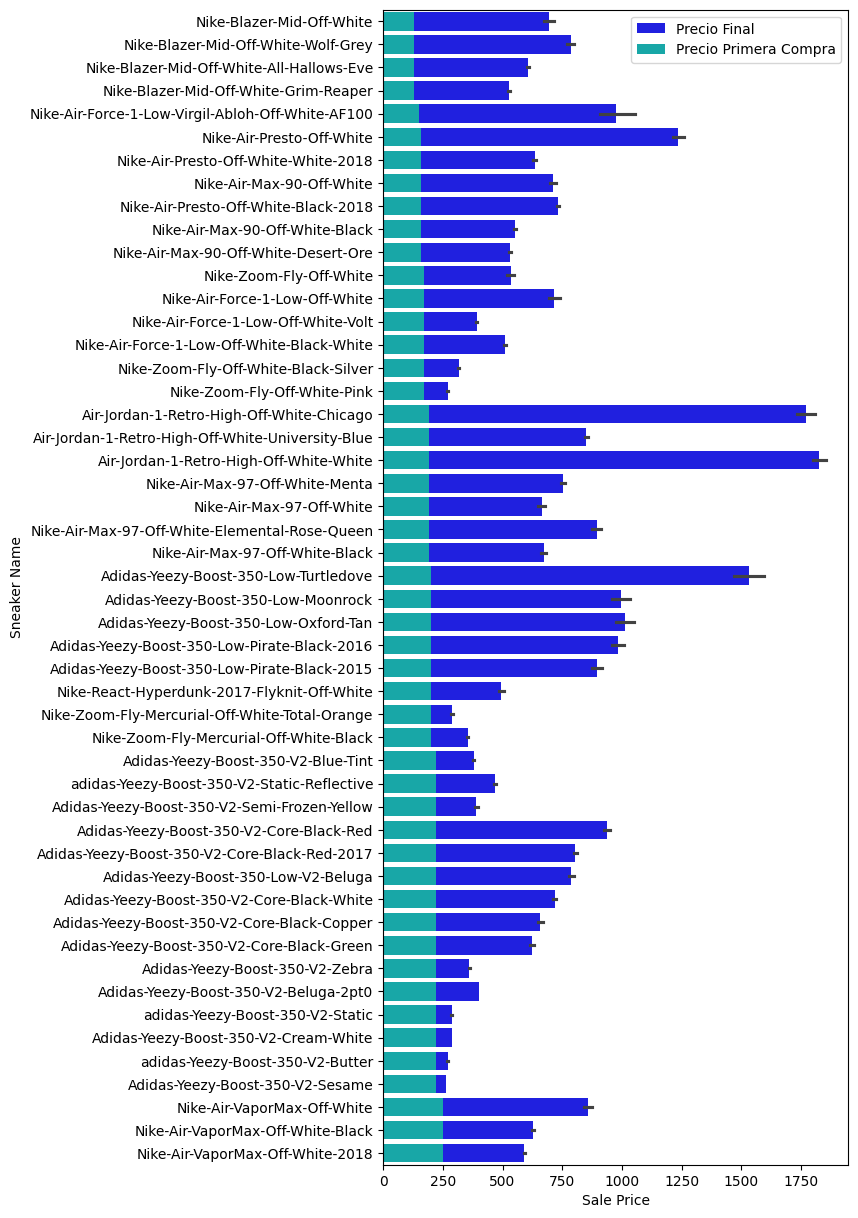

In [26]:
f,ax=plt.subplots(figsize=(6,15))

sns.barplot(
    data=df_zapatillas,
    y="Sneaker Name",
    x="Sale Price",
    label="Precio Final",
    color="b"
)
sns.barplot(
    data=df_zapatillas,
    y="Sneaker Name",
    x="Retail Price",
    label="Precio Primera Compra",
    color="c"
)

<h1>Ejemplo</h1>

In [27]:
#compra_minima=df_zapatillas["Sale Price"].idmin()
compra_maxima=df_zapatillas[df_zapatillas["Sale Price"]==df_zapatillas["Sale Price"].max()]
compra_minima=df_zapatillas[df_zapatillas["Sale Price"]==df_zapatillas["Sale Price"].min()]
print(compra_maxima["Sneaker Name"])


26870    Air-Jordan-1-Retro-High-Off-White-Chicago
Name: Sneaker Name, dtype: object


<h1>Grafica Fechas</h1>

<p>En este apartado realizaremos graficos relacionado con la venta de zapatillas atraves del año, usaremos sobre todo las columnas de: "Release Date" y "Order Date"</p>


<h3>Grafico 1</h3>
<p>En este primer Grafico visualizermos la cantidad de zapatillas que se fueron vendiendo a lo largo de los años, para ver saber en que fechas se vendio mas, para analizar por en dichas fechas se vendio mas y poder replicarlo</p>

<p>Para realizar los gráficos lo primero que deberemos hacer es pasar las columnas de fechas a tipo date, asi podremos dibujar las gráficas correctamente</p>

In [28]:
df_zapatillas["Release Date"]=pd.to_datetime(df_zapatillas["Release Date"],format="mixed")
df_zapatillas["Order Date"]=pd.to_datetime(df_zapatillas["Order Date"],format="mixed")
df_zapatillas.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
55670,2018-10-20,Off-White,Nike-Blazer-Mid-Off-White,1600,130,2017-09-09,14.0,Ohio
52646,2018-10-05,Off-White,Nike-Blazer-Mid-Off-White,1599,130,2017-09-09,8.0,New York
45045,2018-08-17,Off-White,Nike-Blazer-Mid-Off-White,1574,130,2017-09-09,6.0,California
45044,2018-08-17,Off-White,Nike-Blazer-Mid-Off-White,1570,130,2017-09-09,6.0,California
49951,2018-09-24,Off-White,Nike-Blazer-Mid-Off-White,1490,130,2017-09-09,9.5,California


<p>Una vez convertidas las columnas deberemos crearnos otro dataset en la almacenaremos informacion sobre la cantidad de zapatillas que se vendieron en una fecha expecifica y sobre las fechas en las que las dos marcas sacaron mas zapatillas. Esto lo conseguimos haciendo el groupby.</p>

In [29]:
df_fechas=pd.DataFrame()
df_prueba=pd.DataFrame()
lista_ventas_fecha=df_zapatillas.groupby(["Order Date"])["Order Date"].count()
lista_fecha_lanzamiento=df_zapatillas.groupby(["Release Date"])["Release Date"].count()
df_fechas["Ventas_Totales_fecha"]=lista_ventas_fecha
df_prueba["Lanzamientos_Totales_fecha"]=lista_fecha_lanzamiento
df_prueba

,Lanzamientos_Totales_fecha
Release Date,
2015-06-27,68
2015-08-22,95
2015-11-14,100
2015-12-29,70
2016-02-19,122
2016-09-24,498
2016-11-23,723
2016-12-17,621
2017-02-11,969


<p>Una vez creado el dataSet , pintaremos la gráfica en este caso he utilizdo la libreria matplot</p>

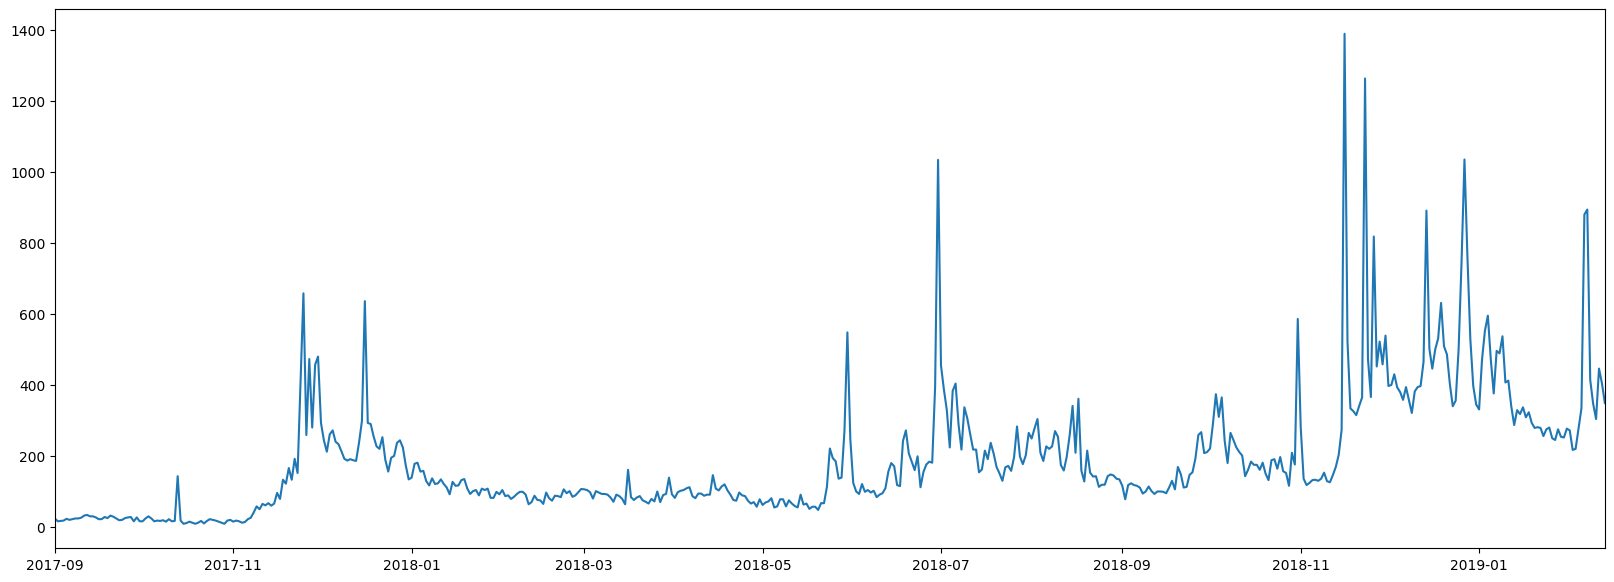

In [30]:
fig=plt.subplots(figsize=(20,7))
plt.plot(df_fechas.index, df_fechas["Ventas_Totales_fecha"])
plt.xlim(df_fechas.index.min(), df_fechas.index.max())
plt.show()

<h3>Gráfica 2</h3>

<p>En este caso pintaremos grafico visualizaremos durante que epocas del año las marcas sacan mas zapatillas </p>

(np.float64(17410.0), np.float64(17940.0))

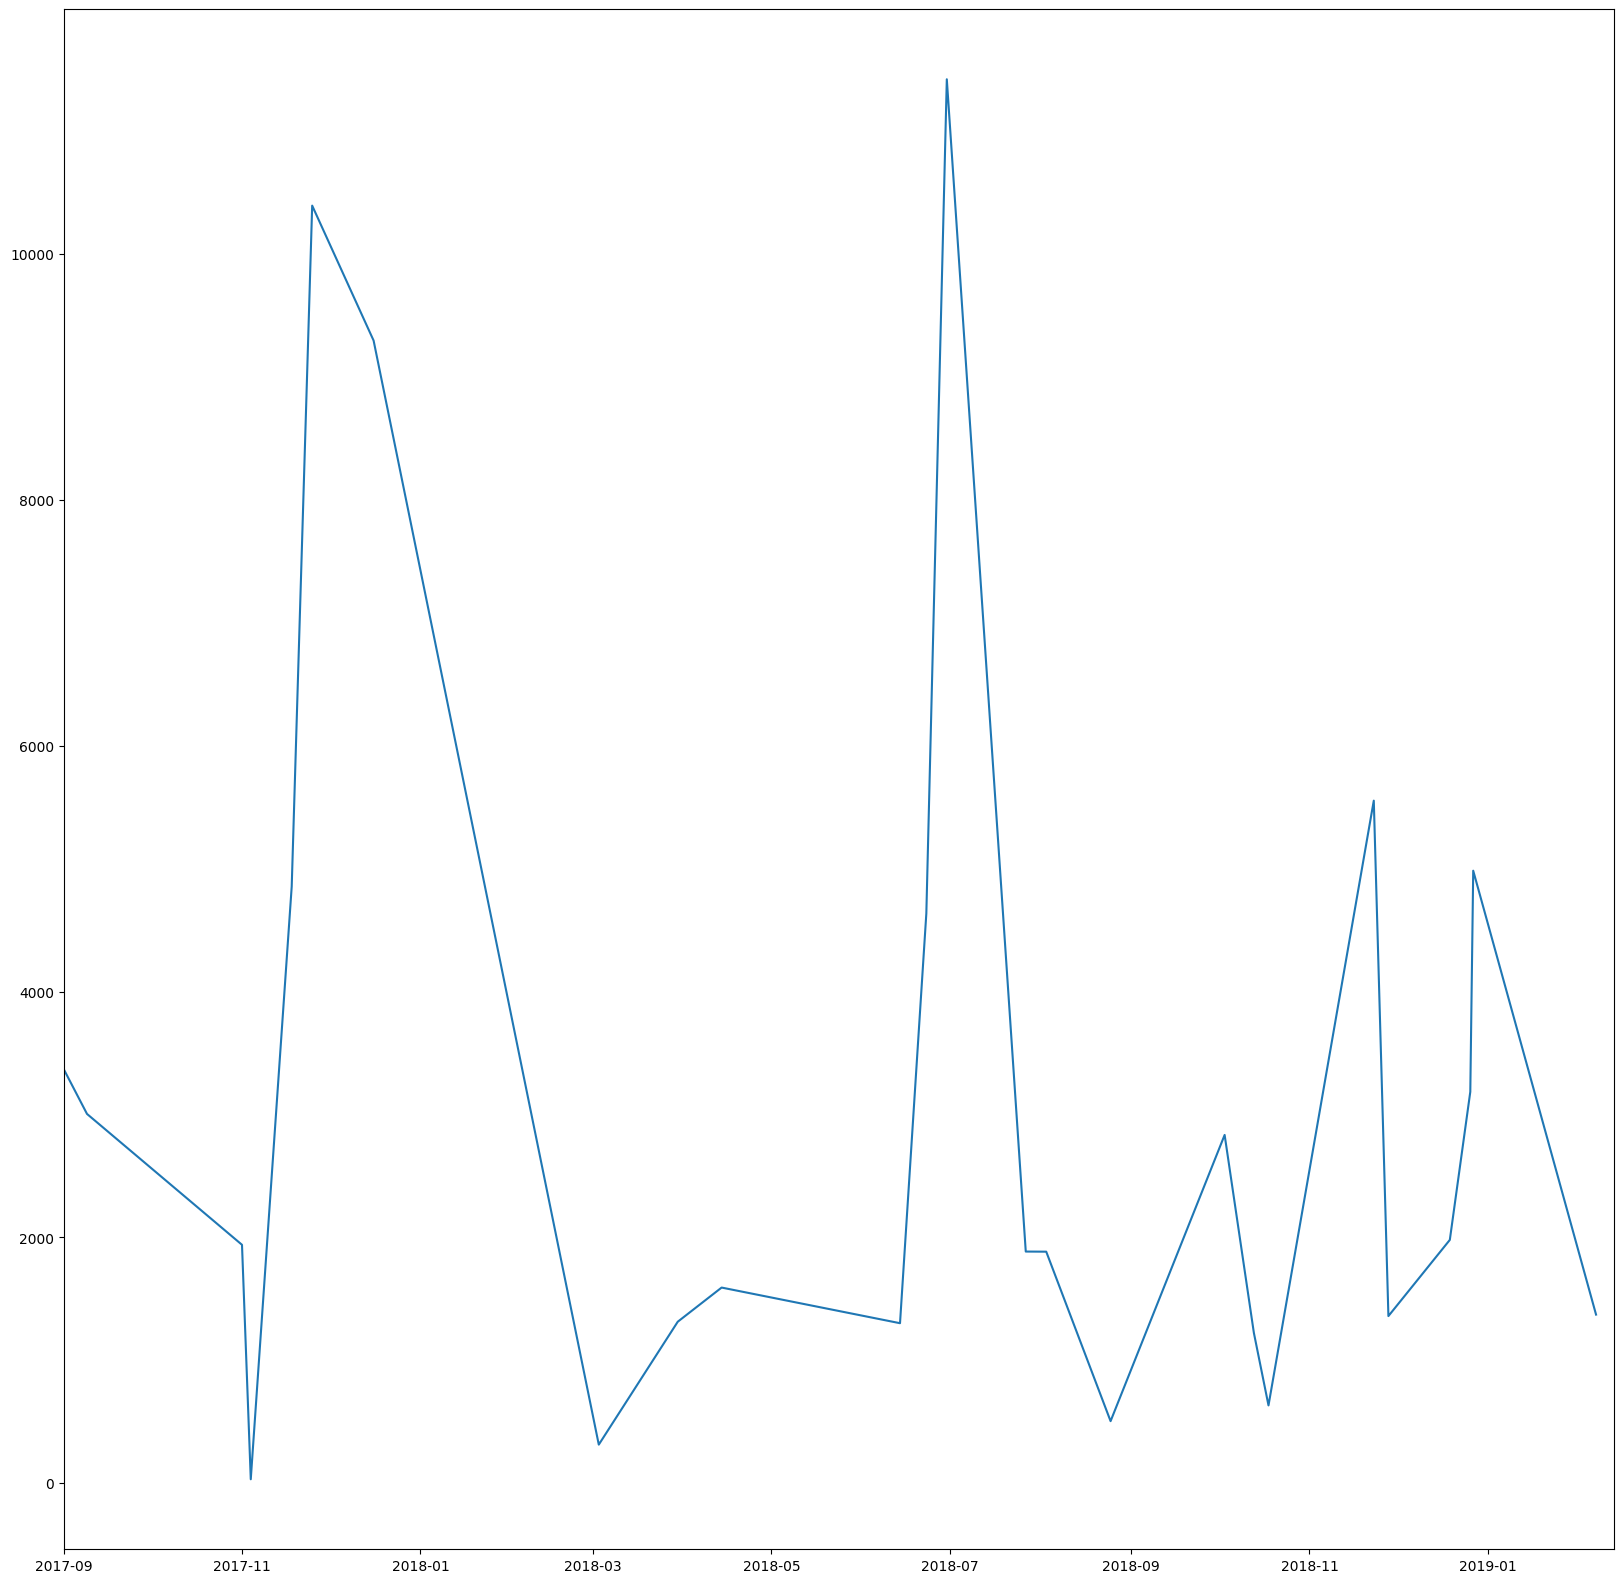

In [31]:

fig=plt.subplots(figsize=(20,20))
plt.plot(df_prueba.index, df_prueba["Lanzamientos_Totales_fecha"])
plt.xlim(df_fechas.index.min(), df_fechas.index.max())

<h1>Mapas</h1>
<p>En este apartado de Mapas visualizaremos varios mapas para visualizar de manera mucho mas sencilla la cantidad de zapatillas vendidas por Estado.</p>
<p>Lista de mapas</p>
<ul>
    <li>Mapa 1:Mapa de rango de color para visualizar por estado la cantidad de zapatillas vendidas</li>
    <li>Mapa 2: Mapa interactivo en la que al pulsar en un estado devolvera la cantidad de zapatillas vendidas divido por zapatilla.</li>
</ul>

<h3>Mapa 1</h3>

<p>Para crear un mapa de calor, el primer paso es crear la escala. Para ello utilizaremos los valores minimo y maximo para saber la escala de colores a la hora de crearlos. Los valores a utilizar seran los maximos y minimos del numero de ventas por estado.  </p>

In [32]:
estados_ventas=df_zapatillas.groupby(["Buyer Region","Brand"])["Brand"].count().unstack()
estados_ventas["ventas_totales"]=df_zapatillas["Buyer Region"].value_counts()
lista_paises=df_zapatillas["Buyer Region"].to_list()
lista_paises_unicos=list(set(lista_paises))
lista_paises_unicos.sort()
estados_ventas["name"]=lista_paises_unicos
estados_ventas.head()

Brand,Yeezy,Off-White,ventas_totales,name
Buyer Region,,,,
Alabama,375,82,457,Alabama
Alaska,41,20,61,Alaska
Arizona,1005,393,1398,Arizona
Arkansas,141,32,173,Arkansas
California,13113,6236,19349,California


In [33]:
colormap = linear.YlGn_09.scale(
    estados_ventas.ventas_totales.min(), estados_ventas.ventas_totales.max()
)

colormap

<p>El segundo  paso es convertir el dataset en un diccionario para mas tarde poder incluirlo en la funcion folium y poder vincular el json con los datos de las coordenadas de cada estado con el dataset del numero de ventas divido por estados</p>

In [34]:
ventas_dict=estados_ventas.set_index("name")["ventas_totales"]
ventas_dict

name
Alabama                   457
Alaska                     61
Arizona                  1398
Arkansas                  173
California              19349
Colorado                  954
Connecticut              1110
Delaware                 1242
District of Columbia      271
Florida                  6376
Georgia                  1846
Hawaii                    383
Idaho                     107
Illinois                 3782
Indiana                  1026
Iowa                      460
Kansas                    340
Kentucky                  488
Louisiana                 537
Maine                     132
Maryland                 1870
Massachusetts            2903
Michigan                 2762
Minnesota                 725
Mississippi               163
Missouri                  660
Montana                    49
Nebraska                  245
Nevada                    790
New Hampshire             241
New Jersey               4720
New Mexico                231
New York                16525
North

<p>El ultimo paso es la creación del mapa.</p>

In [35]:

state_dataa=requests.get("https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json").json()
states = geopandas.GeoDataFrame.from_features(state_dataa, crs="EPSG:4326")
mapa = fl.Map([43, -100], zoom_start=4)
#Primer Mapa
fl.GeoJson(
    state_dataa,
    name="Numero Ventas",
    style_function=lambda feature: {
        "fillColor": colormap(ventas_dict[feature["properties"]["name"]]),
        "color": "black",
        "weight": 1,
        "dashArray": "5, 5",
        "fillOpacity": 0.9,
    },
).add_to(mapa)
colormap.add_to(mapa)
mapa.save("MapaColor.png")
mapa

<h3>Mapa Interactivo</h3>
<p>En esta parte crearemos un mapa interactivo en el que al pulsar en un estado se podra ver la cantidad</p>

<p>Para crear el primer mapa lo primero que deberemos realizar es una llamada a la api que nos da los datos sobre las coordenadas de cada estado para luego pintarlo en el mapa. Una vez pedidos los datos deberemos crear un dataset con esos mismos datos y unirlo a otro dataset que hemos creado con los datos de ventas totales y ventas separada por marca de zapatilla.</p>

<p>Una vez unido los dataset ya podemos utilizarlo para crear el mapa interactivo</p>

In [36]:
state_dataa=requests.get("https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json").json()
estados=geopandas.GeoDataFrame.from_features(state_dataa,crs="EPSG:4326")
prueba=df_zapatillas.groupby(["Buyer Region","Brand"])["Brand"].count().unstack()
prueba["ventas_totales"]=df_zapatillas["Buyer Region"].value_counts()
lista_paises=df_zapatillas["Buyer Region"].to_list()
lista_paises_unicos=list(set(lista_paises))
lista_paises_unicos.sort()
prueba["name"]=lista_paises_unicos
estados=pd.merge(estados,prueba,on="name", how='right')
estados.head()

,geometry,name,Yeezy,Off-White,ventas_totales
0,"POLYGON ((-87.3593 35.00118, -85.60668 34.9847...",Alabama,375,82,457
1,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691...",Alaska,41,20,61
2,"POLYGON ((-109.0425 37.00026, -109.04798 31.33...",Arizona,1005,393,1398
3,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",Arkansas,141,32,173
4,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",California,13113,6236,19349


In [37]:
state_data=requests.get("https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json").json()
mapa = fl.Map([43, -100], zoom_start=4)
popup=fl.GeoJsonPopup(fields=["name","ventas_totales","Off-White"," Yeezy"],
        aliases=["Estado:","Ventas Totales:","Ventas Off-White","Ventas Yeezy:"],             
    )
fl.GeoJson(
    estados,
    popup=popup
   
).add_to(mapa)

mapa

<h1>Estadisticas</h1>

<p>En este apartado visualizaremos unas estadicticas basicas sobre los el dataset elegido</p>

In [38]:

print("El valor promedio de las ventas que se realizan es de:"+str(np.mean(df_zapatillas["Sale Price"])))


El valor promedio de las ventas que se realizan es de:446.63471927648163


<p>En esta estadistica nos encargaremos de ver que modelo de zapatilla saca mas dinero,Para eso deberemos primero sacar cuanto dinero se saca por las ventas de cada modelo en total, luego sacar cuanto modelo cuesta cada uno a la marca original. Una vez echo lo meteremos dentro de un dataset para luego pintar un grafico. </p>

<p>Ahora que tenemos creado el dataframe con el que prodemos pintar una grafica con los datos</p>

In [39]:
df_comparacion=pd.DataFrame()
df_comparacion["Suma Compra"]=df_zapatillas.groupby(["Sneaker Name"])["Retail Price"].sum()
df_comparacion["Suma Ventas"]=df_zapatillas.groupby(["Sneaker Name"])["Sale Price"].sum()
df_comparacion["Ganancias"]=df_comparacion["Suma Ventas"]-df_comparacion["Suma Compra"]
df_comparacion=df_comparacion.reset_index()

df_comparacion=df_comparacion.sort_values(["Suma Compra","Suma Ventas","Ganancias"],ascending=[True,False,False])
df_comparacion.head()

,Sneaker Name,Suma Compra,Suma Ventas,Ganancias
23,Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100,4650,30241,25591
4,Adidas-Yeezy-Boost-350-Low-Turtledove,13600,104153,90553
1,Adidas-Yeezy-Boost-350-Low-Oxford-Tan,14000,70806,56806
2,Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015,19000,85034,66034
0,Adidas-Yeezy-Boost-350-Low-Moonrock,20000,99671,79671


<p>En el dataset no se aprecia correctamente, por eso visualizaremos una gráfica con cada columna.</p>

<p>En este gráfico visualizaremos la cantidad invertida en la compra de cada modelo</p>

Text(0.5, 1.0, 'Suma Total Ventas Zapatillas')

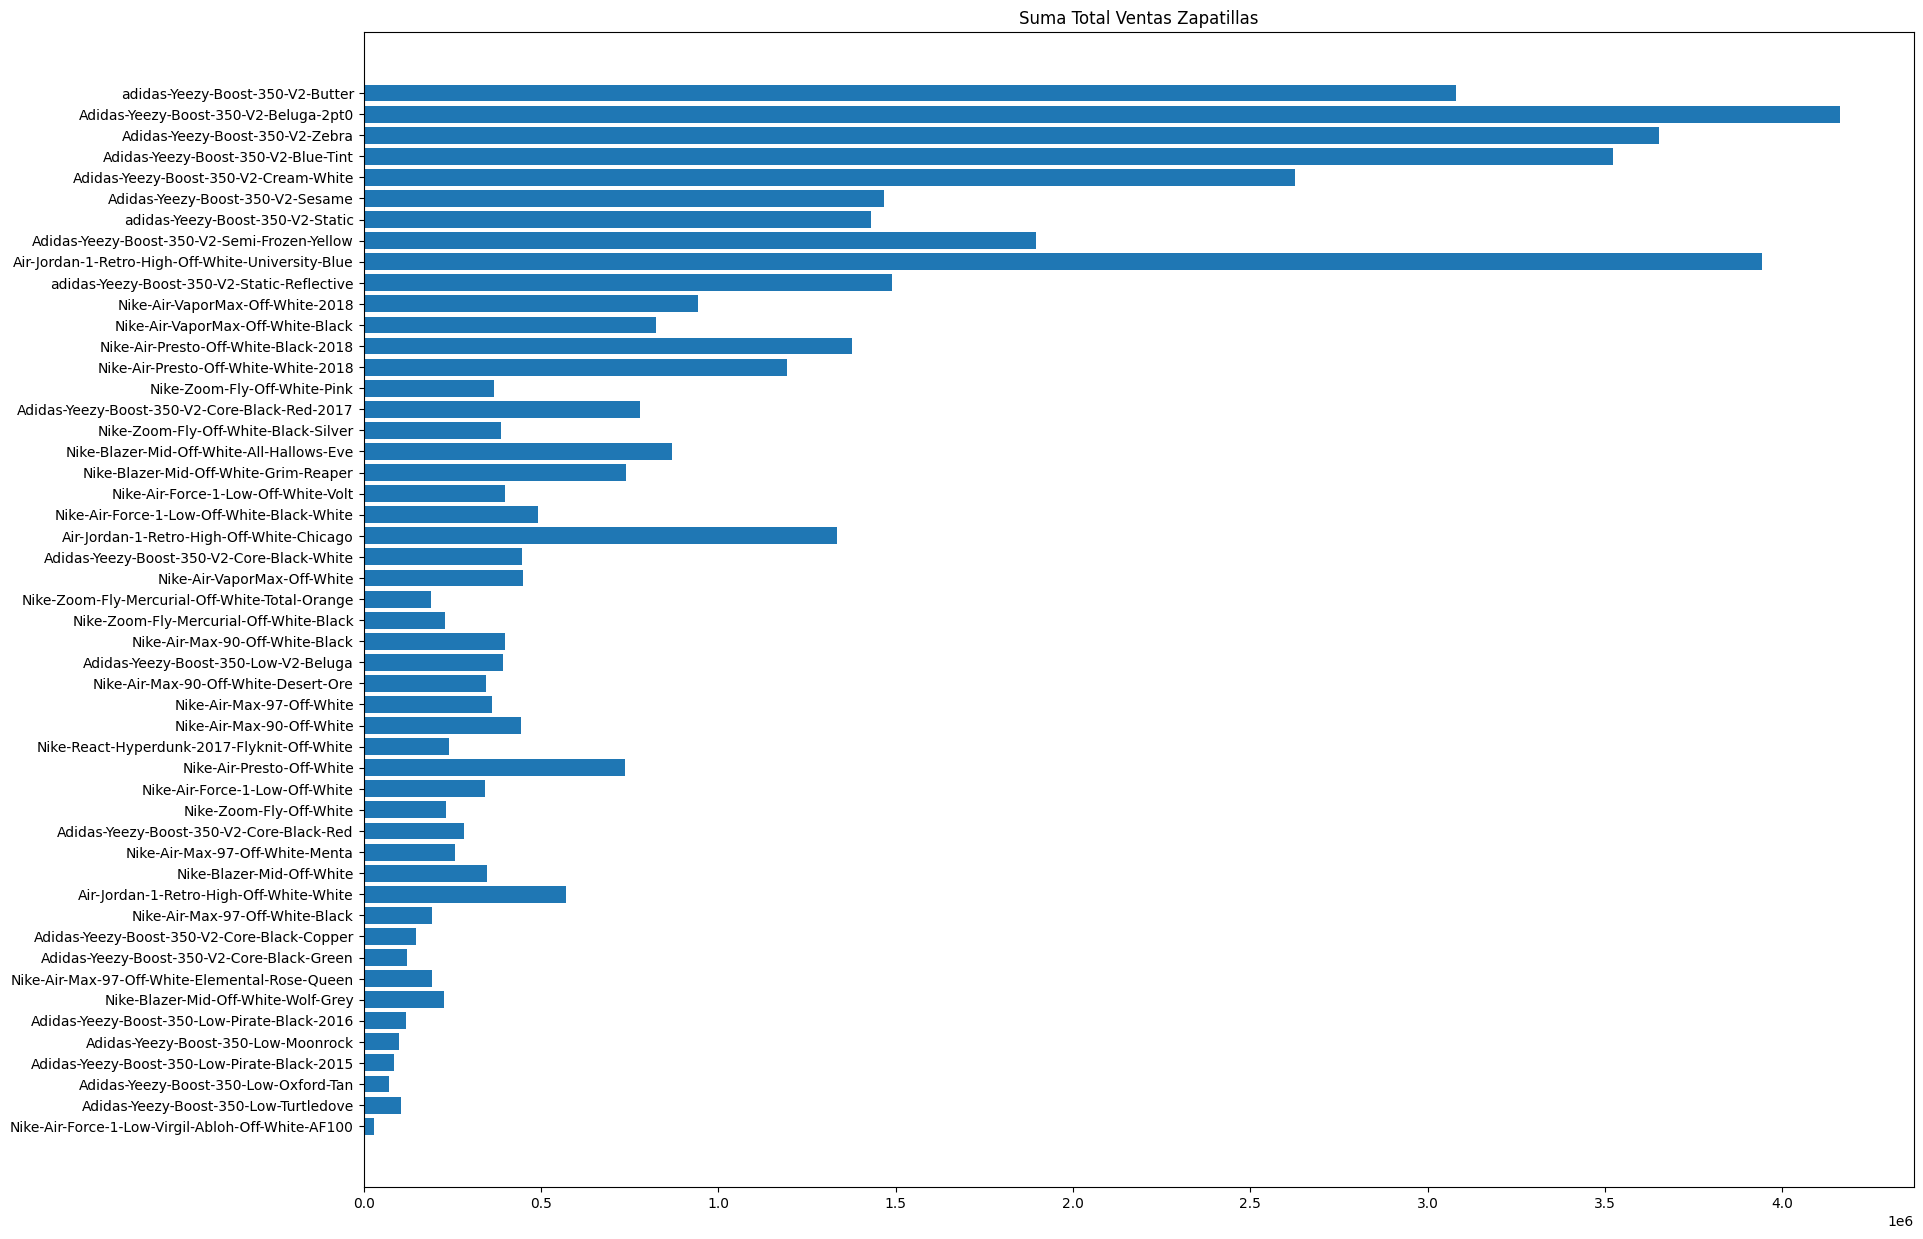

In [172]:
fig, ax = plt.subplots(figsize=(20,15))
ax.barh(df_comparacion["Sneaker Name"], df_comparacion["Suma Ventas"], align='center')
ax.set_title('Suma Total Ventas Zapatillas')

<p>En este segundo gráfico visualizaremos las ganancias totales generadas de cada modelo</p>

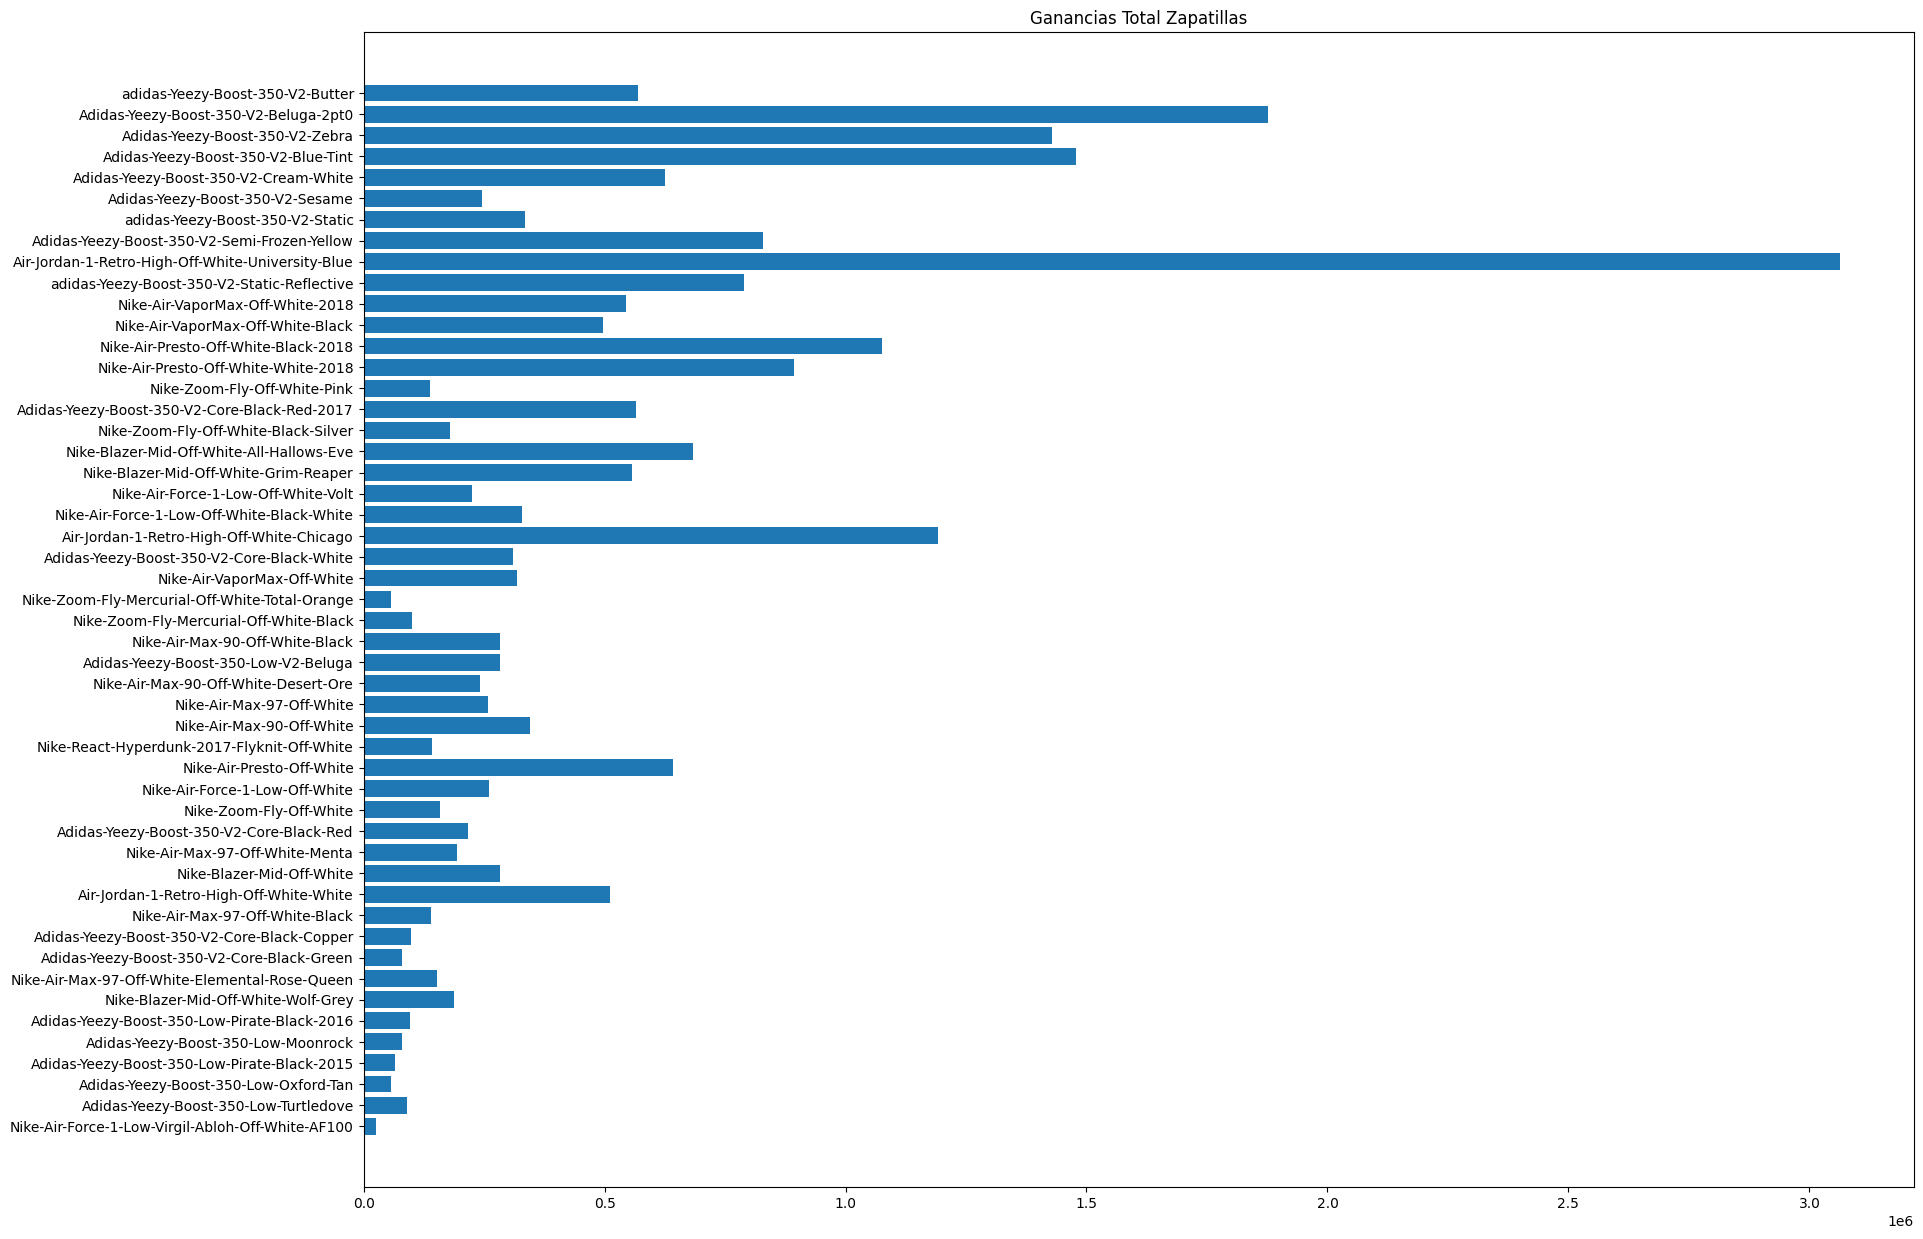

In [40]:

fig, ax = plt.subplots(figsize=(20,15))
 
ax.barh(df_comparacion["Sneaker Name"], df_comparacion["Ganancias"], align='center')
ax.set_title('Ganancias Total Zapatillas')

plt.show()


<p>En este tercer gráfico visualizaremos en el dinero generado por la venta total de cada modelo</p>

Text(0.5, 1.0, 'Suma Total Compra Zapatillas')

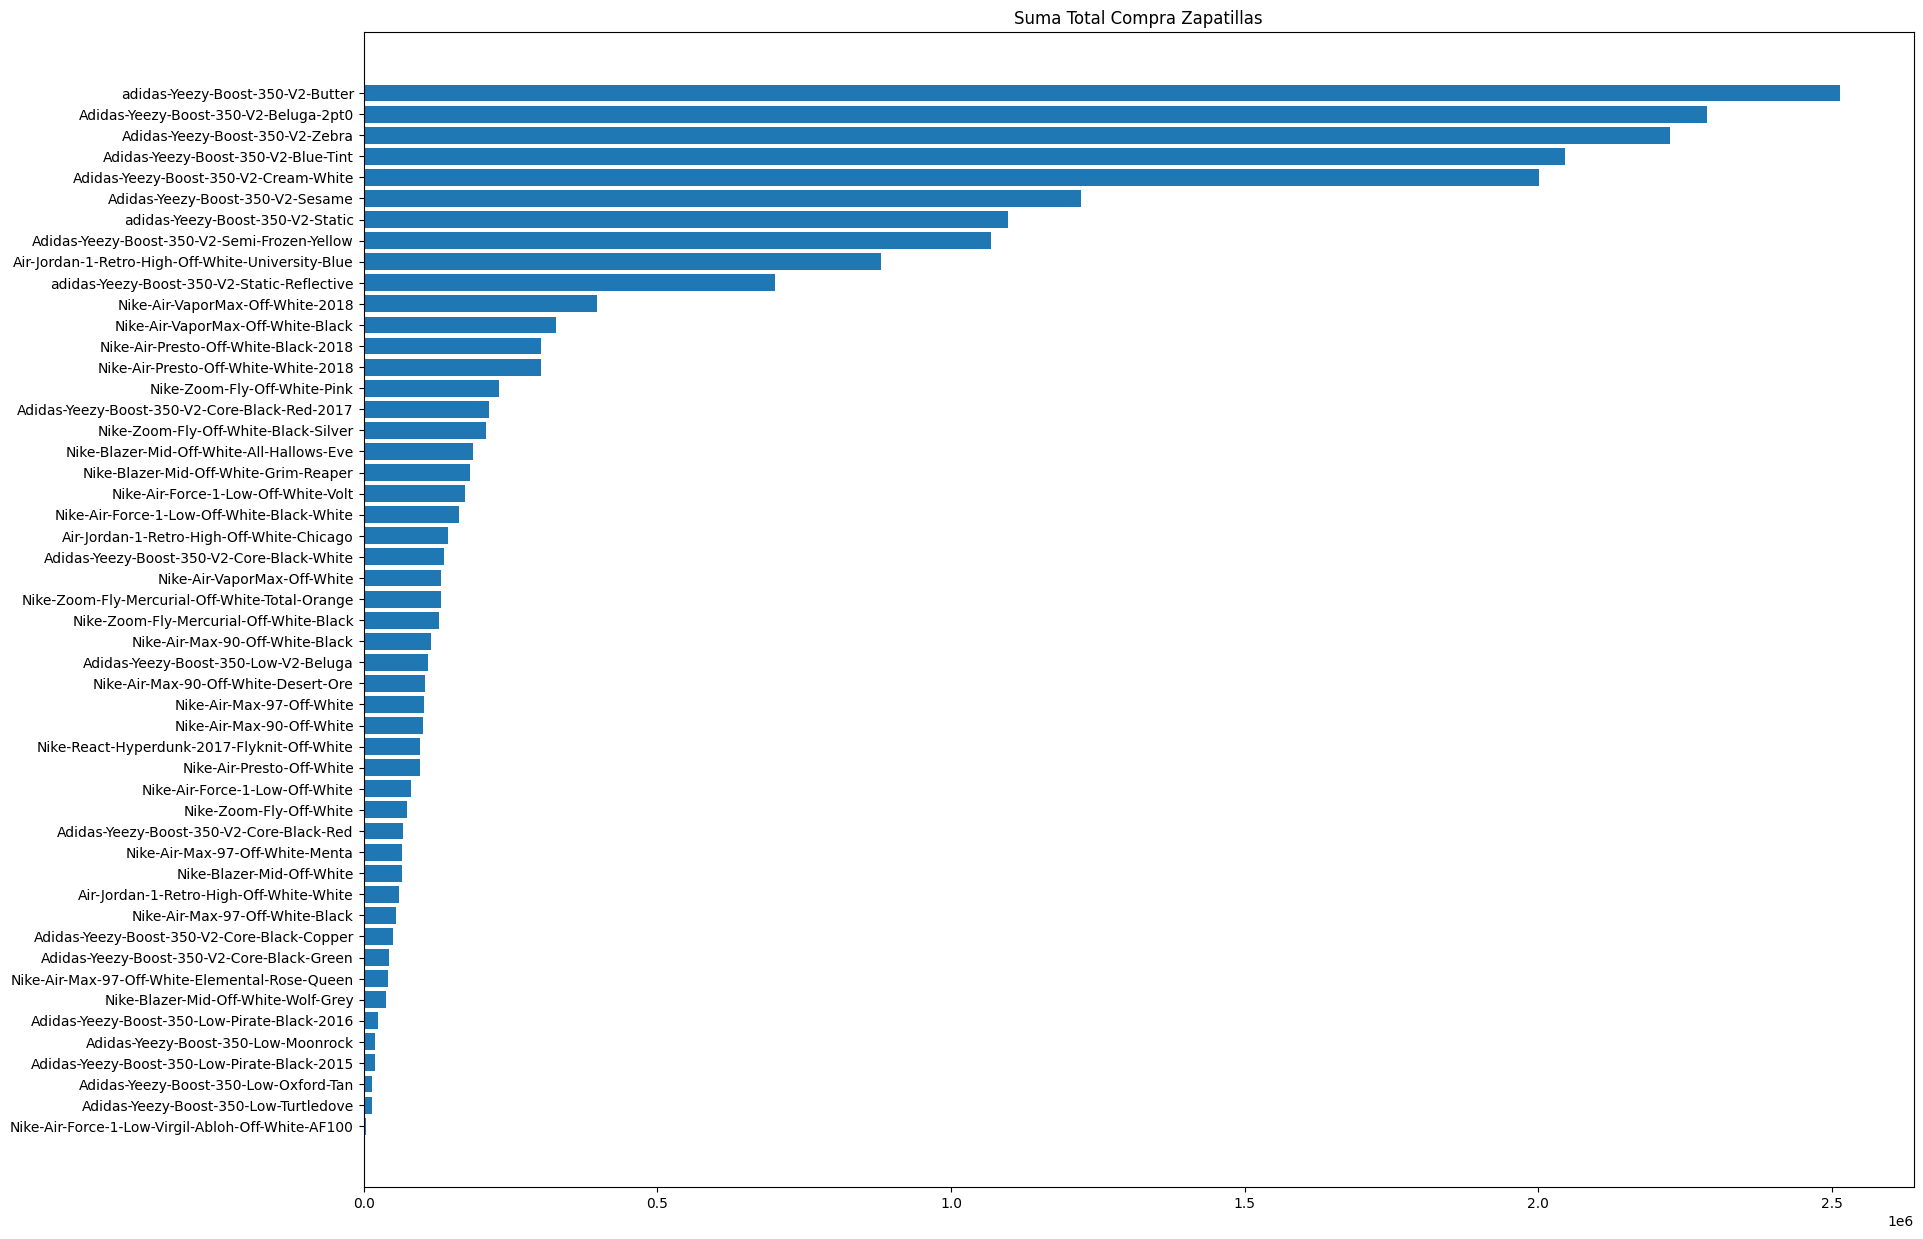

In [41]:
ig, ax = plt.subplots(figsize=(20,15))
ax.barh(df_comparacion["Sneaker Name"], df_comparacion["Suma Compra"], align='center')
ax.set_title('Suma Total Compra Zapatillas')

In [42]:
df_comparacion_estados=pd.DataFrame()
df_comparacion_estados["Suma Compra"]=df_zapatillas.groupby(["Buyer Region"])["Retail Price"].sum()
df_comparacion_estados["Suma Ventas"]=df_zapatillas.groupby(["Buyer Region"])["Sale Price"].sum()
df_comparacion_estados["Ganancias"]=df_comparacion_estados["Suma Ventas"]-df_comparacion_estados["Suma Compra"]
df_comparacion_estados=df_comparacion_estados.reset_index()

df_comparacion_estados=df_comparacion_estados.sort_values(["Suma Compra","Suma Ventas","Ganancias"],ascending=[True,False,False])

df_comparacion_estados.head()

,Buyer Region,Suma Compra,Suma Ventas,Ganancias
50,Wyoming,8770,13751,4981
26,Montana,10600,20375,9775
41,South Dakota,11860,21601,9741
1,Alaska,12620,26560,13940
34,North Dakota,13500,27122,13622


<p>En este apartado visualizaremos las mas mismas gráficas que en el anterior apartado, pero en vez de cada modelo sera por estado</p>

<p>En este primer gráfico visualizaremos el total generado por la venta de zapatillas divido por estado</p>

Text(0.5, 1.0, 'Suma Total Ventas Zapatillas por Estado')

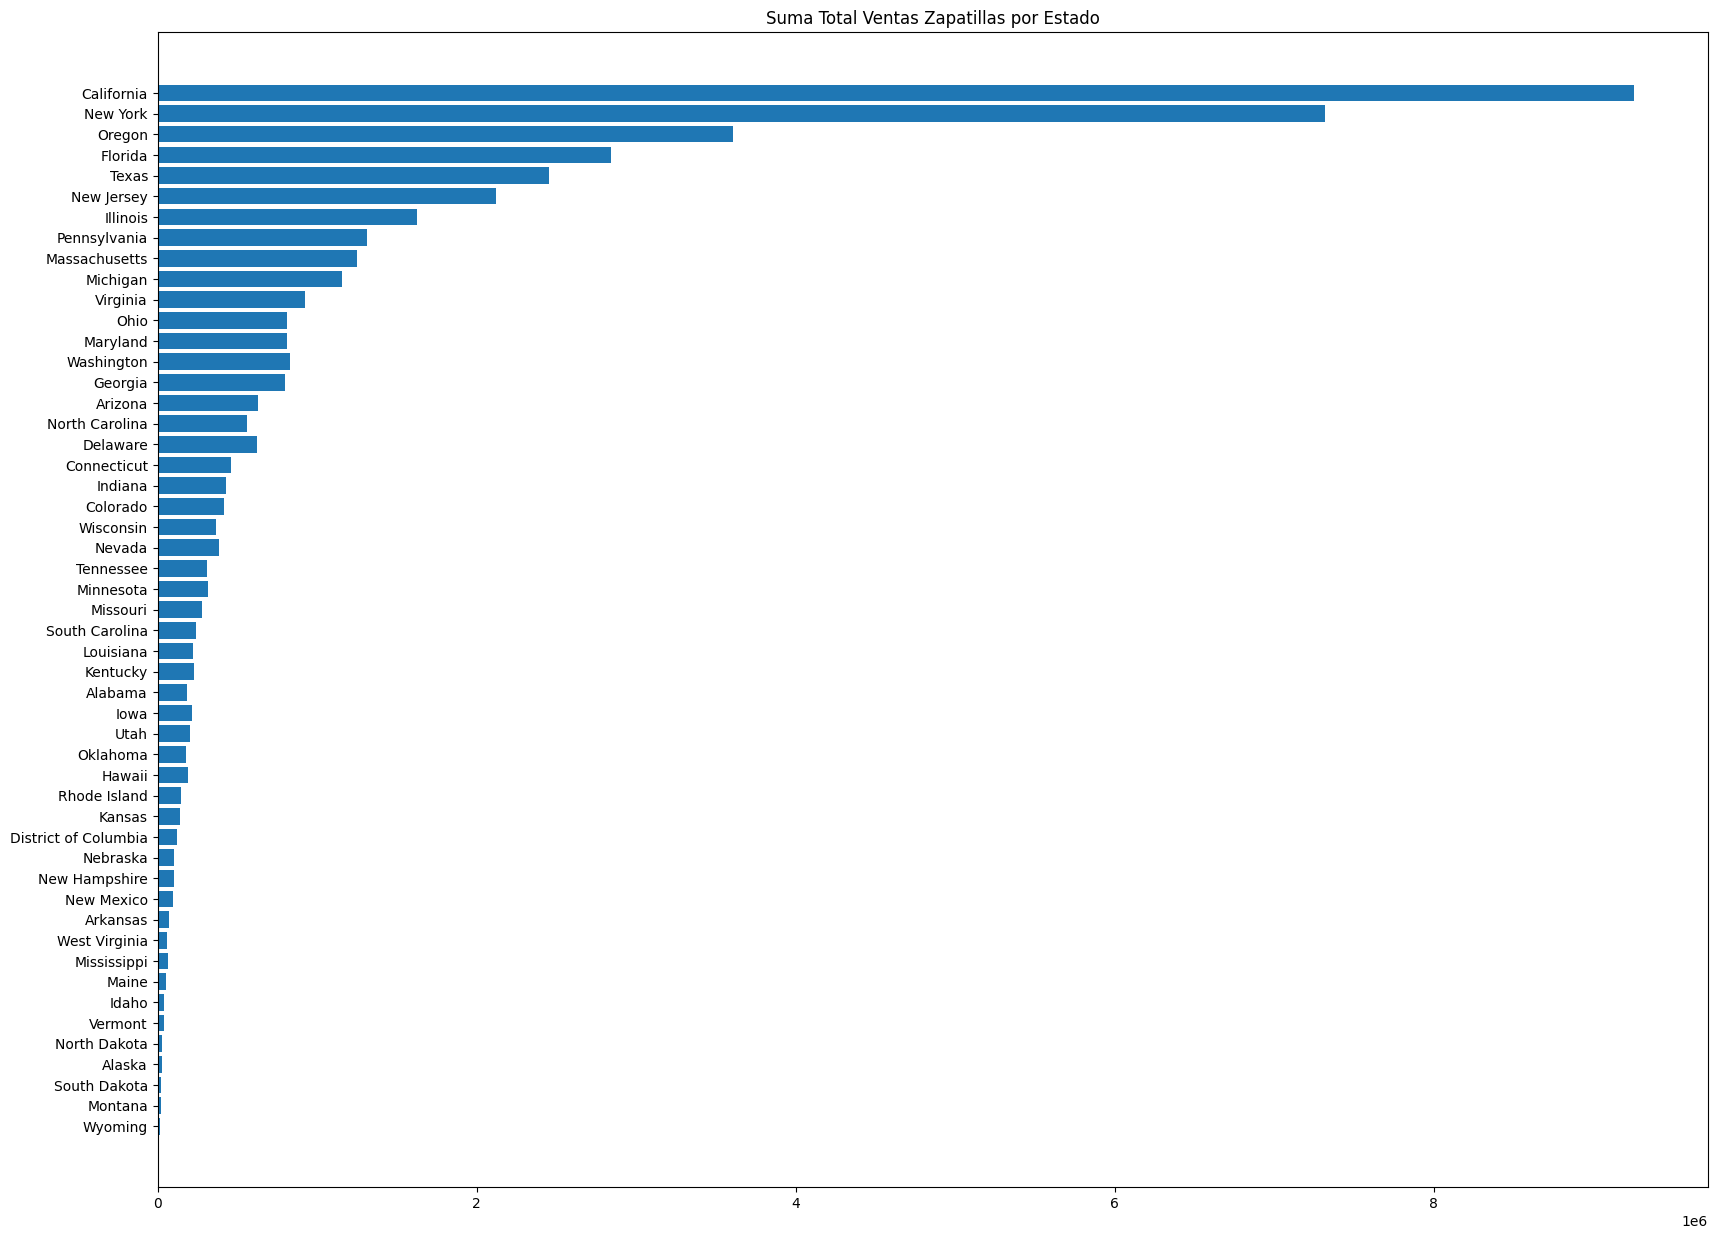

In [43]:
fig, ax = plt.subplots(figsize=(20,15))
ax.barh(df_comparacion_estados["Buyer Region"], df_comparacion_estados["Suma Ventas"], align='center')
ax.set_title('Suma Total Ventas Zapatillas por Estado')

<p>En este grafico visualizaremos el total invertido en la comprá de las zapatillas divido por estado</p>

Text(0.5, 1.0, 'Suma Total Compra Zapatillas por Estados')

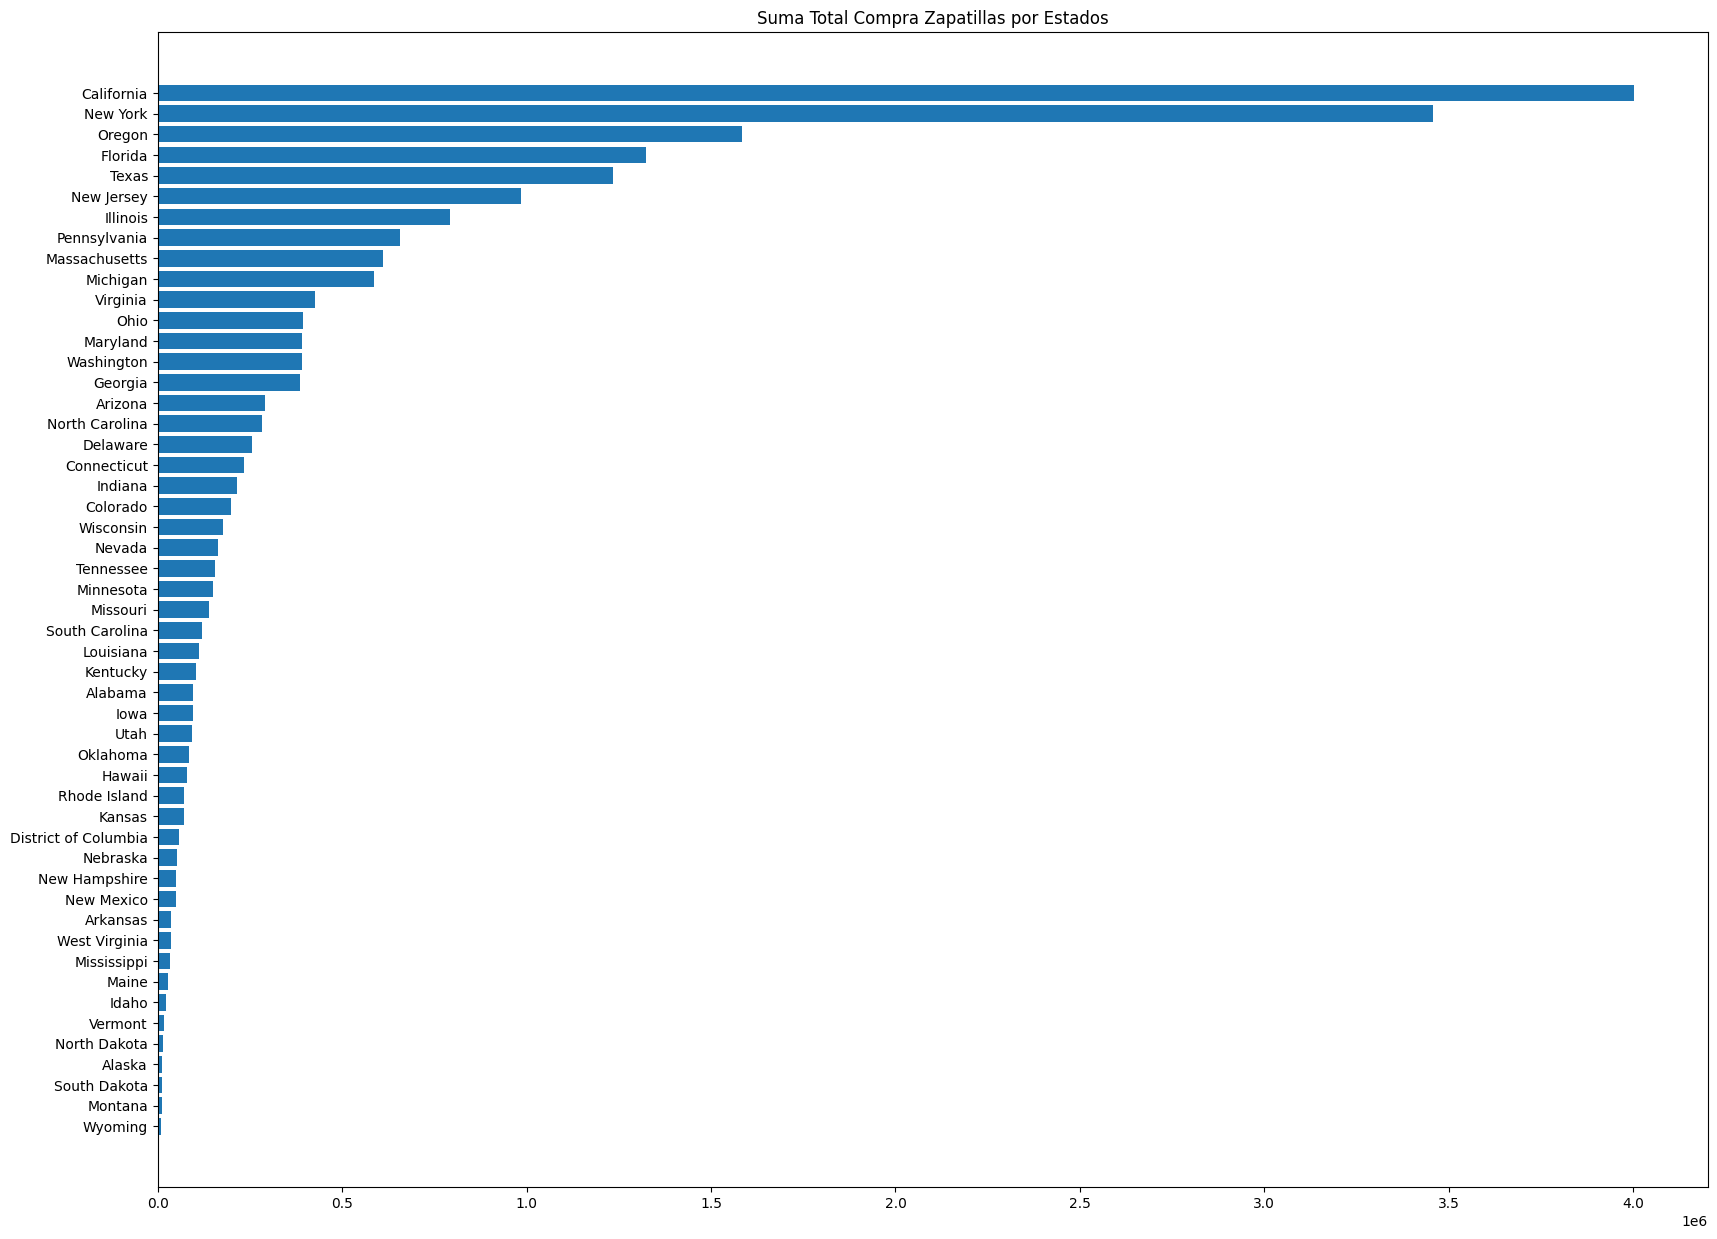

In [44]:
ig, ax = plt.subplots(figsize=(20,15))
ax.barh(df_comparacion_estados["Buyer Region"], df_comparacion_estados["Suma Compra"], align='center')
ax.set_title('Suma Total Compra Zapatillas por Estados')

<p>En está ultima gráfica visualizaremos la ganancia total generado de la compra y venta de zapatillas divido por estado</p>

Text(0.5, 1.0, 'Ganancia Total por Estados')

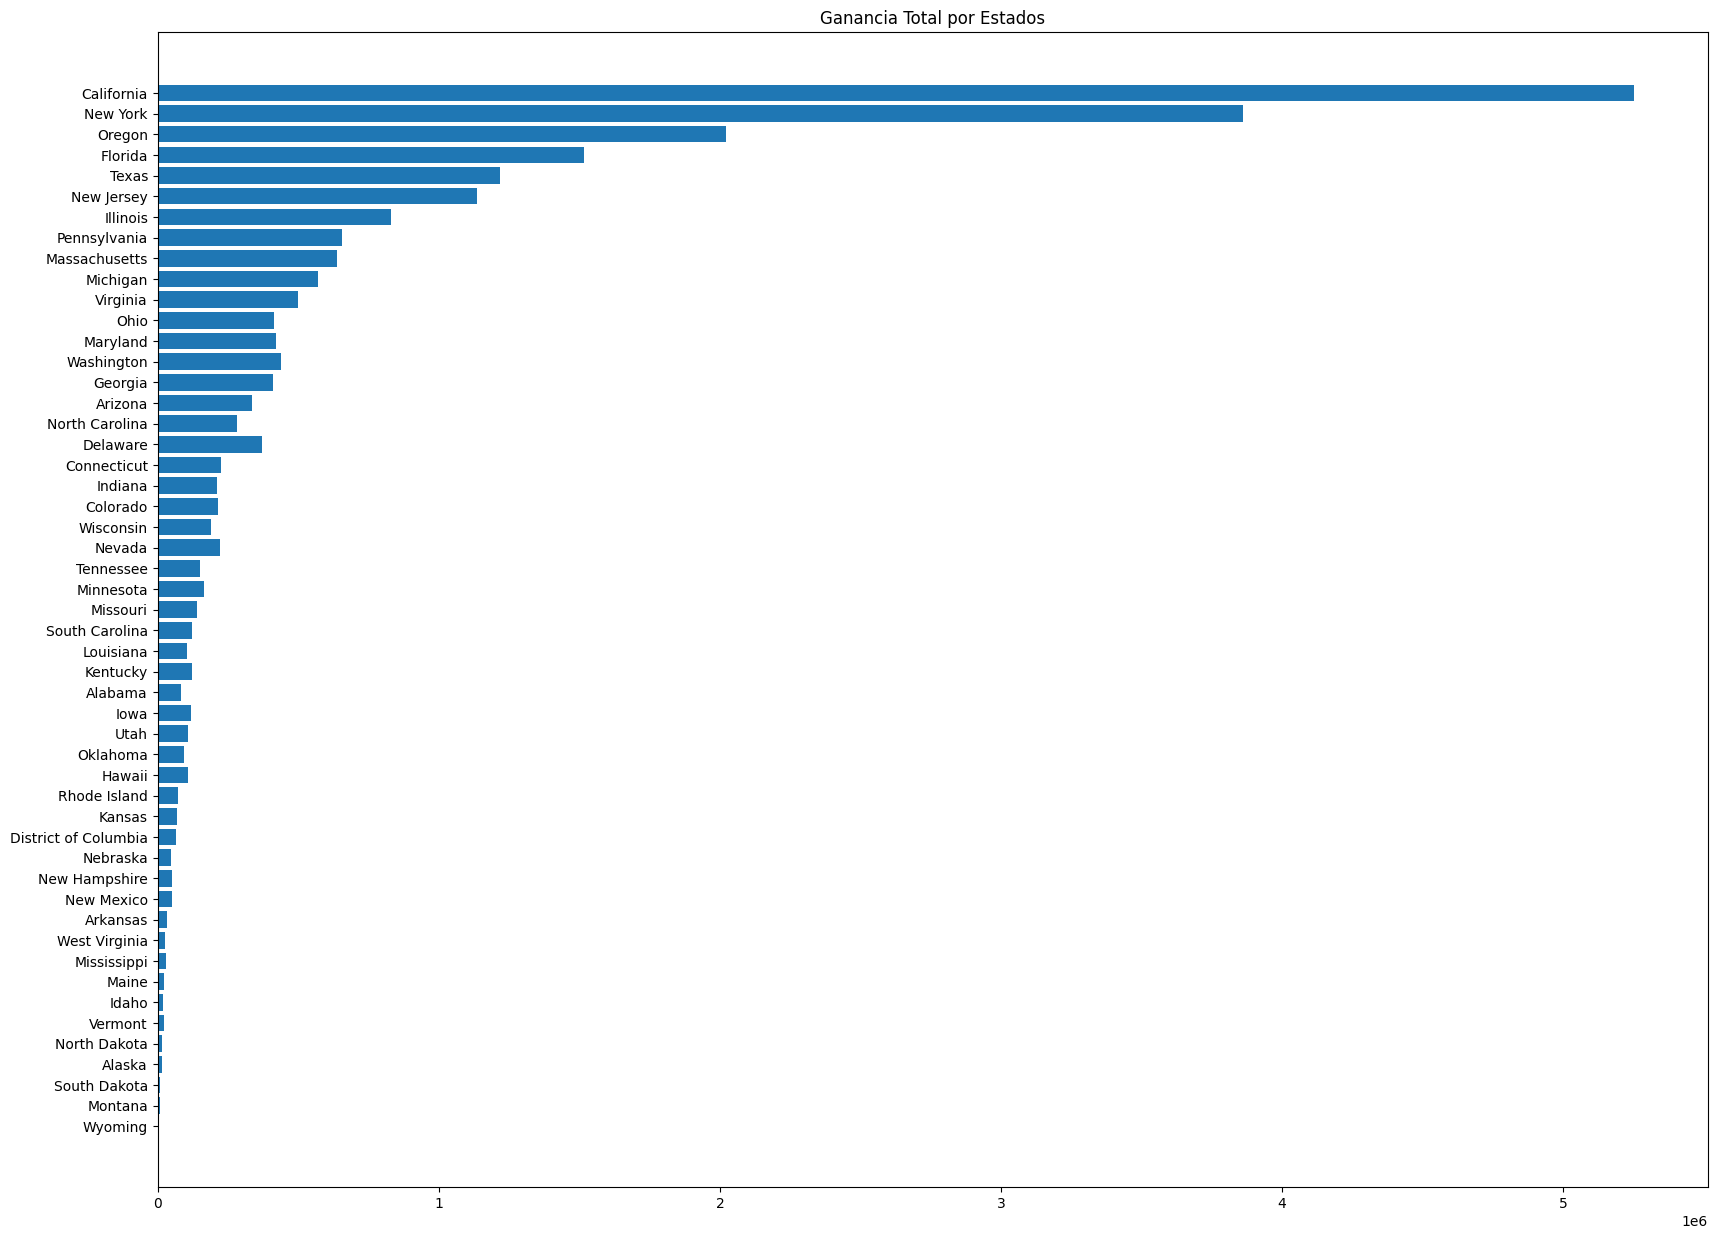

In [45]:
ig, ax = plt.subplots(figsize=(20,15))
ax.barh(df_comparacion_estados["Buyer Region"], df_comparacion_estados["Ganancias"], align='center')
ax.set_title('Ganancia Total por Estados')

<h2>Five Number Summary</h2>

<p>En este resumen nos encargaremos de sacar las estadisticas: minimo, 1st quartile, median, 3rd quartile y maximo</p>
<p>Este resumen lo realizaremos sobre las columnas:Sale Price, Retail Price, Shoe Size</p>

<h3>Five Number Summary Sale Price</h3>

<p>Valor Minimo Sale Price</p>

In [46]:
#establecer array con los valores de la columna Sale Price
array_salePrice=np.array(df_zapatillas["Sale Price"])
#Establecer valor minimo y maximo de la columna Sale Price
valor_minimo_salePrice=np.amin(array_salePrice)
valor_maximo_salePrice=np.amax(array_salePrice)
print(f"Valor minimo Sale Price:{valor_minimo_salePrice}. Valor máximo Sale Price:{valor_maximo_salePrice}")


Valor minimo Sale Price:186. Valor máximo Sale Price:4050


<p>Calculo Mediana Sale Price</p>

In [47]:
mediana_salePrice=np.median(array_salePrice)
print(f"El valor de la mediana es {mediana_salePrice}")

El valor de la mediana es 370.0


<p>Calculo del Primer Cuartil y Tercer Cuartil</p>

In [48]:
primer_cuartil_salePrice=np.percentile(array_salePrice,25)
tercer_cuartil_salePrice=np.percentile(array_salePrice,75)
print(f"El valor del primer cuartil es:{primer_cuartil_salePrice} y el tercer cuartil es:{tercer_cuartil_salePrice}")

El valor del primer cuartil es:275.0 y el tercer cuartil es:540.0


<p>Calculo Rango Intercuartil columna Sale Price</p>

<p>El Rango Intercuartil consiste en la diferencia entre el tercer cuartil y el primer cuartil, en este rango siempre se encuentra el 50% de los datos. </p>

In [49]:
rango_intercuartil=tercer_cuartil_salePrice-primer_cuartil_salePrice
print(f"El Rango Intercuartil es {rango_intercuartil}")

El Rango Intercuartil es 265.0


<h3>Five Number Summary Retail Price</h3>

<p>Valor minimo y maximo Retail Price</p>

In [50]:
array_retailPrice=np.array(df_zapatillas["Retail Price"])
valor_minimo_retailPrice=np.amin(array_retailPrice)
valor_maximo_retailPrice=np.amax(array_retailPrice)
print(f"El valor minimo de la columna Retail Price es {valor_minimo_retailPrice}. El valor máximo de la columna Retail Price es {valor_maximo_retailPrice}")

El valor minimo de la columna Retail Price es 130. El valor máximo de la columna Retail Price es 250


<p>Cáculo Mediana Retail Price</p>

In [51]:
mediana_retailPrice=np.median(array_retailPrice)
print(f"La mediana de la cadena Sale Price es {mediana_retailPrice}")

La mediana de la cadena Sale Price es 220.0


<p>Cálculo Primer y Tercer Cuartil</p>

In [52]:
primer_cuartil_salePrice=np.percentile(array_retailPrice,25)
tercer_cuartil_salePrice=np.percentile(array_retailPrice,75)
print(f"El primer cuartil es:{primer_cuartil_salePrice}. El tercer cuartil es:{tercer_cuartil_salePrice}")

El primer cuartil es:220.0. El tercer cuartil es:220.0


<p>Cálculo Rango Intercuartil </p>

In [54]:
print(f"El Rango Intercuartil es {primer_cuartil_salePrice-tercer_cuartil_salePrice}")

El Rango Intercuartil es 0.0


<h3>Five Number Summary Shoe Size</h3>

<p>Valor Minimo y Maximo Shoe Size</p>

In [55]:
array_Shoesize=np.array(df_zapatillas["Shoe Size"])
valor_minimo_Shoesize=np.amin(array_Shoesize)
valor_maximo_Shoesize=np.amax(array_Shoesize)
print(f"El valor mínimo es {valor_minimo_Shoesize} y el valor máximo es:{valor_maximo_Shoesize}")

El valor mínimo es 3.5 y el valor máximo es:17.0


<p>Cáculo Mediana Shoe Size</p>

In [56]:
mediana_Shoesize=np.median(array_Shoesize)
print(f"El valor de la mediana es:{mediana_Shoesize}")

El valor de la mediana es:9.5


<p>Cáculo Primer y Tercer cuartil</p>

In [57]:
primer_cuartil_shoeSize=np.percentile(array_Shoesize,25)
tercer_cuartil_shoeSize=np.percentile(array_Shoesize,75)
print(f"El valor del primer cuartil es:{primer_cuartil_shoeSize}. El valor del tercer cuartil es:{tercer_cuartil_shoeSize}")

El valor del primer cuartil es:8.0. El valor del tercer cuartil es:11.0


<p>Calculo Rango Intercuartil</p>

In [58]:
print(f"El rango intercuartil es {tercer_cuartil_shoeSize-primer_cuartil_shoeSize}")

El rango intercuartil es 3.0


In [63]:
df_zapatillas["Sneaker Name"]df_zapatillas["Sale Price"].min()

np.int64(186)

'Air-Jordan-1-Retro-High-Off-White-Chicago'